In [1]:
import matplotlib.pyplot as plt
import numpy as np
import OOPAO




     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             




In [2]:
import tomoAO
tomoAO.__version__

'0.0.3'

In [3]:
ao_mode = "MLAO"

config_dir = "/home/joaomonteiro/Desktop/OOPAO/tutorials/"

keck = False

if keck:
    config_file = "config_keck.ini"
else:
    config_file = "config.ini"
# Loading the config
config_vars = tomoAO.IO.load_from_ini(config_file, ao_mode=ao_mode,config_dir=config_dir)

In [4]:
from scipy.io import savemat, loadmat

savemat(f'/home/joaomonteiro/Desktop/OOPAO/tutorials/Params.mat', config_vars)
params_path = f'/home/joaomonteiro/Desktop/OOPAO/tutorials/Params.mat'
with open(f'/home/joaomonteiro/Desktop/oomao/spaceODT_reconstruction_files/params_files/TestName.txt', "w") as file:
    file.write(params_path)

In [5]:
from OOPAO.Source import Source
from OOPAO.Asterism import Asterism

optBand = config_vars["lgs_opticalBand"]
magnitude = config_vars["lgs_magnitude"]
lgs_zenith = config_vars["lgs_zenith"]
lgs_azimuth = config_vars["lgs_azimuth"]
lgs_altitude = config_vars["lgs_altitude"]

n_lgs = config_vars["n_lgs"]

lgsAst = Asterism([Source(optBand=optBand,
              magnitude=magnitude,
              coordinates=[lgs_zenith[kLgs], lgs_azimuth[kLgs]],
            altitude=lgs_altitude)
          for kLgs in range(n_lgs)])



------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  90.00  
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,90]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              | 180.00  
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       |


------------ Telescope -------------
Diameter [m]             |   8.00   
Resolution [px]          |   160    
Pixel size [m]           |   0.05   
Surface [m²]             |   0.05   
Central obstruction [%]  |    10    
Pixels in pupil          |  19900   
Field of view [arcsec]   |  30.00   
------------------------------------



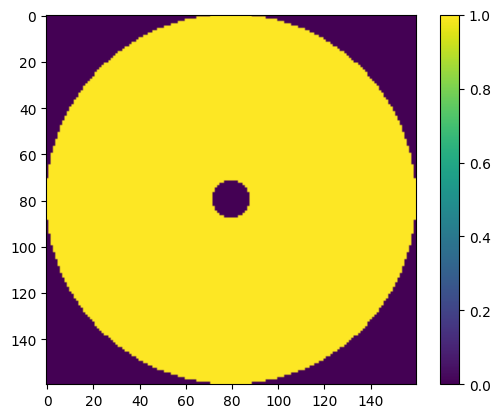

In [6]:
from OOPAO.Telescope import Telescope

from importlib import reload
reload(OOPAO.Telescope)
from OOPAO.Telescope import Telescope


sensing_wavelength = lgsAst.src[0].wavelength      # sensing wavelength of the WFS, read from the ngs object
n_subaperture      = config_vars["nSubaperture"]                  # number of subaperture across the diameter
diameter           = config_vars["diameter"]                   # diameter of the support of the phase screens in [m]
resolution         = config_vars["resolution"]     # resolution of the phase screens in pixels
# pixel_size         = diameter/resolution # size of the pixels in [m]
obs_ratio          = config_vars["centralObstruction"]                 # central obstruction in fraction of the telescope diameter
sampling_time      = config_vars["samplingTime"]             # sampling time of the AO loop in [s]
fieldOfViewInArcsec = config_vars["fieldOfViewInArcsec"]




# initialize the telescope object
tel = Telescope(diameter          = diameter,
               resolution         = resolution,
               centralObstruction = obs_ratio,
               samplingTime       = sampling_time,
               fov                = fieldOfViewInArcsec)

if keck:
    from skimage.transform import resize
    data = loadmat(f'/home/joaomonteiro/Desktop/SpaceODT/ReconstructionTests/Data/Matrices/tel_pupil.mat')
    pupil = data['pup']  # Extract the array
    pupil_resample = resize(pupil, tel.pupil.shape, anti_aliasing=True, preserve_range=True)
    # pupil_resample = resize(pupil[30:-30, 40:-40], tel.pupil.shape, preserve_range=True)

    tel.pupil = pupil_resample


plt.imshow(tel.pupil)
plt.colorbar()

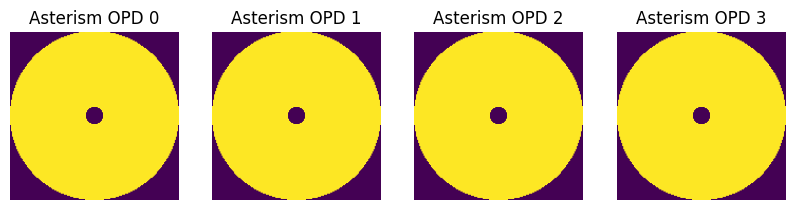

In [7]:
lgsAst**tel

fig, axes = plt.subplots(1, n_lgs, figsize=(10, 4))

if n_lgs == 1:
    axes.imshow(lgsAst.OPD[0])
    axes.axis('off')
    axes.set_title(f'Asterism OPD {0}')

else:
    for i in range(n_lgs):
        axes[i].imshow(lgsAst.OPD[i])
        axes[i].axis('off')
        axes[i].set_title(f'Asterism OPD {i}')


Creation of layer1/3 ...
-> Computing the initial phase screen...
initial phase screen : 0.009400367736816406 s
ZZt.. : 1.5947585105895996 s
ZXt.. : 0.41644811630249023 s
XXt.. : 0.17854738235473633 s
Done!
Creation of layer2/3 ...
-> Computing the initial phase screen...
initial phase screen : 0.0324397087097168 s
ZZt.. : 2.0615220069885254 s
ZXt.. : 0.46968722343444824 s
XXt.. : 0.22702527046203613 s
Done!
Creation of layer3/3 ...
-> Computing the initial phase screen...
initial phase screen : 0.0181121826171875 s
ZZt.. : 2.5582644939422607 s
ZXt.. : 0.6346819400787354 s
XXt.. : 0.29673218727111816 s
Done!
Updating the Atmosphere covariance matrices...

------------------------ Atmosphere -------------------------
 Layer | Direction | Speed | Altitude | Frac Cn² | Diameter |
       |    [°]    | [m/s] |   [m]    |   [%]    |   [m]    |
   1   |     0     |  5.0  |  0e+00   |    50    |  8.200   |
   2   |    30     | 15.0  |  5e+03   |    30    |  8.950   |
   3   |    70     | 25.0 

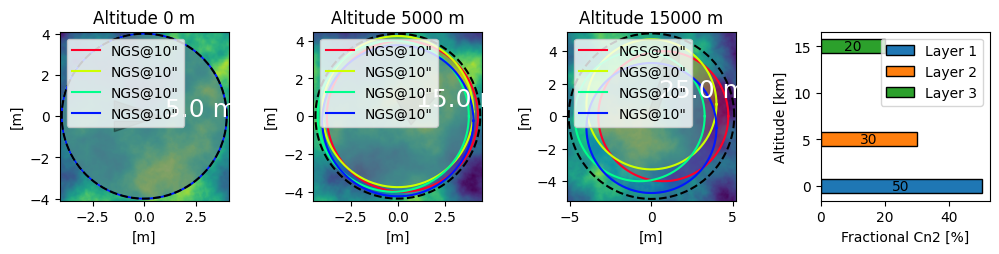

In [8]:
from OOPAO.Atmosphere import Atmosphere

r0 = config_vars["r0"]
L0 = config_vars["L0"]

fractionnalR0 = config_vars["fractionnalR0"]
windSpeed = config_vars["windSpeed"]
windDirection = config_vars["windDirection"]
altitude = config_vars["altitude"]



atm = Atmosphere(telescope      = tel,
                 r0             = r0,
                 L0             = L0,
                 fractionalR0   = fractionnalR0,
                 altitude       = altitude,
                 windDirection  = windDirection,
                 windSpeed      = windSpeed)


atm.initializeAtmosphere(telescope=tel)
tel+atm
atm.display_atm_layers()


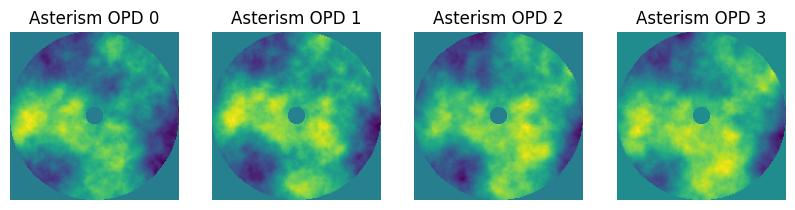

In [9]:
lgsAst**tel

fig, axes = plt.subplots(1, n_lgs, figsize=(10, 4))

if n_lgs == 1:
    axes.imshow(lgsAst.OPD[0])
    axes.axis('off')
    axes.set_title(f'Asterism OPD {0}')

else:
    for i in range(n_lgs):
        axes[i].imshow(lgsAst.OPD[i])
        axes[i].axis('off')
        axes[i].set_title(f'Asterism OPD {i}')


No user-input pixel scale - using shannon_sampling input value:2 pixel(s) per spot FWHM
-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   160   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------

Selecting valid subapertures based on flux considerations..
Acquiring reference slopes..
updating the flux of the SHWFS object
Done!
Recalibrating the slopes units
Acquiring reference slopes..
Done!
Done
OOPAO Warning: 
All Detector Noises are disables with the geometric WFS

------- Shack-Hartmann WFS --------
Subapertures [lenslets]  |   20    
Subaperture Pitch [m]    |  0.40   
Subaperture FoV [arcsec] |  1.21   
Pixel Scale [arcsec]     |  0.152  
Valid Subapertures       |   624   
Spot Sampling [pix]   

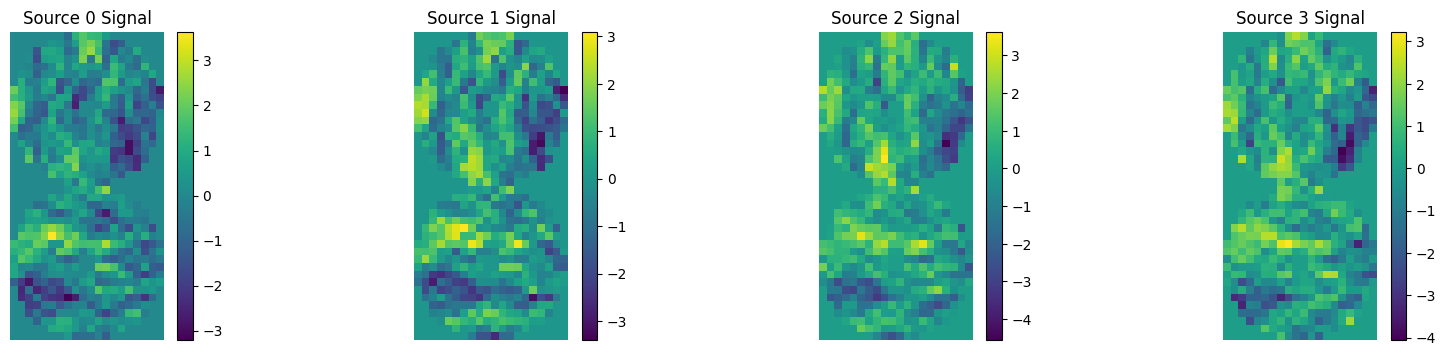

In [10]:
from OOPAO.ShackHartmann import ShackHartmann

is_geometric = True
if config_vars["wfs_type"] == "d":
    is_geometric = False

shwfs = ShackHartmann(telescope          = tel,
                      src                = lgsAst,
                      nSubap             = n_subaperture,
                      lightRatio         = 0.5,
                      is_geometric       = is_geometric,
                      shannon_sampling   = True,
                      threshold_cog      = 0.01)

shwfs_geom = ShackHartmann(telescope     = tel,
                      src                = lgsAst,
                      nSubap             = n_subaperture,
                      lightRatio         = 0.5,
                      is_geometric       = True,
                      shannon_sampling   = True,
                      threshold_cog      = 0.01)

if keck:

    unfiltered_subap_mask = np.loadtxt("/home/joaomonteiro/Desktop/SpaceODT/ReconstructionTests/Data/Matrices/padded_subap_mask_keck.txt",
                                    dtype=bool, delimiter=",")

    if unfiltered_subap_mask.shape[0] != config_vars['nSubaperture']:
        unfiltered_subap_mask = np.pad(unfiltered_subap_mask,
                                        pad_width=int(config_vars['nSubapExtra']/2),
                                        mode='constant',
                                        constant_values=0)

    filtered_subap_mask = np.loadtxt("/home/joaomonteiro/Desktop/SpaceODT/ReconstructionTests/Data/Matrices/keck_valid_subap_mask.txt",
                                        dtype=bool, delimiter=",")

    if filtered_subap_mask.shape[0] != config_vars['nSubaperture']:
        filtered_subap_mask = np.pad(filtered_subap_mask,
                                        pad_width=int(config_vars['nSubapExtra']/2),
                                        mode='constant',
                                        constant_values=0)
    
    shwfs.valid_slopes_maps[:24, :] = unfiltered_subap_mask.copy()
    shwfs.valid_slopes_maps[24:, :] = unfiltered_subap_mask.copy()

    shwfs.valid_subapertures = unfiltered_subap_mask
    shwfs.subap_mask = unfiltered_subap_mask 
    shwfs.filtered_subap_mask = filtered_subap_mask
    shwfs.unfiltered_subap_mask = unfiltered_subap_mask



    shwfs.nValidSubaperture = np.count_nonzero(shwfs.valid_subapertures)


    shwfs_geom.valid_slopes_maps[:24, :] = unfiltered_subap_mask.copy()
    shwfs_geom.valid_slopes_maps[24:, :] = unfiltered_subap_mask.copy()

    shwfs_geom.valid_subapertures = unfiltered_subap_mask
    shwfs_geom.filtered_subap_mask = filtered_subap_mask
    shwfs_geom.unfiltered_subap_mask = unfiltered_subap_mask

    shwfs_geom.nValidSubaperture = np.count_nonzero(shwfs_geom.valid_subapertures)

        
    # shwfs.all_subapertures = unfiltered_subap_mask
else:
    shwfs.unfiltered_subap_mask = shwfs.valid_subapertures.copy()
    shwfs.filtered_subap_mask = shwfs.valid_subapertures.copy()

lgsAst**tel*shwfs

fig, axes = plt.subplots(1, n_lgs, figsize=(20, 4))

if n_lgs == 1:
    # axes = axes.reshape(2, 1)
    axes = np.atleast_1d(axes)

for i in range(n_lgs):
    im = axes[i].imshow(shwfs.signal_2D[i])
    axes[i].axis('off')
    axes[i].set_title(f'Source {i} Signal')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)


In [11]:
from OOPAO.DeformableMirror import DeformableMirror
from OOPAO.MisRegistration import MisRegistration


if keck:
    mechanical_coupling = 0.1458

    misReg = MisRegistration(config_vars)


    unfiltered_act_mask = np.loadtxt("/home/joaomonteiro/Desktop/SpaceODT/ReconstructionTests/Data/Matrices/act_mask_keck.txt", dtype=bool, delimiter=",")

    filtered_act_mask = shwfs.get_valid_actuators()

    if unfiltered_act_mask.shape[0] != config_vars['nActuator']:
        unfiltered_act_mask = np.pad(unfiltered_act_mask, pad_width=int(config_vars['nSubapExtra']/2), mode='constant', constant_values=0)

    if filtered_act_mask.shape[0] != config_vars['nActuator']:
        filtered_act_mask = np.pad(filtered_act_mask, pad_width=int(config_vars['nSubapExtra']/2), mode='constant', constant_values=0)



    X, Y = tomoAO.tools.tomography_tools.meshgrid(config_vars['nActuator'], tel.D, offset_x=0.0, offset_y=0.0, stretch_x=1, stretch_y=1)
    coordinates = np.array([X[filtered_act_mask], Y[filtered_act_mask]]).T
    # coordinates = np.array([Y[act_mask], X[act_mask]]).T

    # resolution = tel.resolution

    # tel.resolution = config_vars['dm_resolution']
    dm_fried = DeformableMirror(telescope=tel,
                                nSubap=config_vars['nSubaperture'],
                                mechCoupling=config_vars['mechanicalCoupling'],
                                misReg=misReg,
                                coordinates=coordinates,
                                pitch=tel.D / (config_vars['nActuator'] - 1))


    dm_fried.unfiltered_act_mask = unfiltered_act_mask
    dm_fried.filtered_act_mask = filtered_act_mask
    tel.resolution = resolution

else:
    mechanical_coupling = 0.1458

    dm_fried = DeformableMirror(telescope    = tel,
                                nSubap       = n_subaperture, # by default n_subaperture+1 actuators are considered (Fried Geometry)
                                mechCoupling = mechanical_coupling)

    # dm_fried.coefs = np.random.rand(dm_fried.nValidAct)
    dm_fried.coefs = 0



No coordinates loaded.. taking the cartesian geometry as a default
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   356   
M4                       |  False  
Pitch [m]                |  0.40   
Mechnical coupling [%]   |   15    
== Misregistration ================
Rotation [°]             |  0.000  
Shift X [m]              |0.000e+00
Shift Y [m]              |0.000e+00
Anamorphosis angle [°]   |  0.000  
Tangential scaling [%]   |  0.000  
Radial scaling [%]       |  0.000  
-----------------------------------



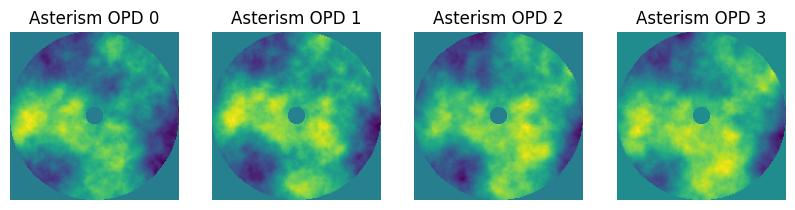

In [12]:
lgsAst**tel*dm_fried

fig, axes = plt.subplots(1, n_lgs, figsize=(10, 4))

if n_lgs == 1:
    axes.imshow(lgsAst.OPD[0])
    axes.axis('off')
    axes.set_title(f'Asterism OPD {0}')

else:
    for i in range(n_lgs):
        axes[i].imshow(lgsAst.OPD[i])
        axes[i].axis('off')
        axes[i].set_title(f'Asterism OPD {i}')


In [13]:
np.sqrt(141**2+ 88**2+ 85**2+ 93**2)

np.float64(208.56413881585684)

In [14]:
np.sqrt(120**2+ 133**2+ 153**2)


np.float64(235.58013498595335)

In [15]:
np.sqrt(120**2+ 58**2+ 78**2 + 40**2 + 83**2)


np.float64(179.82491484774852)

In [16]:
# X, Y = tomoAO.tools.tomography_tools.meshgrid(config_vars['nActuator'], tel.D, offset_x=0.0, offset_y=0.0, stretch_x=1, stretch_y=1)
# filtered_act_coords = np.array([X[dm_fried.filtered_act_mask], Y[dm_fried.filtered_act_mask]]).T
# unfiltered_act_coords = np.array([X[dm_fried.unfiltered_act_mask], Y[dm_fried.unfiltered_act_mask]]).T

# plt.scatter(unfiltered_act_coords[:, 0], unfiltered_act_coords[:, 1], label = "Unfiltered", marker="x", color="red")
# plt.scatter(filtered_act_coords[:, 0], filtered_act_coords[:, 1], label = "Filtered", linewidths=2.5, color="green")
# plt.title("Actuators")
# plt.legend(loc="upper right")


In [17]:
# filtered_subap_coords = np.where(shwfs.filtered_subap_mask)
# unfiltered_subap_coords = np.where(shwfs.unfiltered_subap_mask)


# filtered_act_coords = np.where(dm_fried.filtered_act_mask)
# unfiltered_act_coords = np.where(dm_fried.unfiltered_act_mask)


# fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# axes[0].scatter(unfiltered_subap_coords[0], unfiltered_subap_coords[1], label = "Unfiltered", marker="x", color="red")
# axes[0].scatter(filtered_subap_coords[0], filtered_subap_coords[1], label = "Filtered", linewidths=2.5, color="green")
# axes[0].set_title(f'Subapertures')

# axes[1].scatter(unfiltered_act_coords[0], unfiltered_act_coords[1], marker="x", color="red")
# axes[1].scatter(filtered_act_coords[0], filtered_act_coords[1], linewidths=2.5, color="green")
# axes[1].set_title(f'Actuators')

# fig.legend(loc="upper right")



In [18]:
# import numpy as np

# def get_valid_actuator(mask):
#     # Assuming obj.validActuator is not empty and obj.validLenslet is a 2D array
#     n_elements = 2 * 24 + 1  # Linear number of lenslet+actuator
#     valid_lenslet_actuator = np.zeros((n_elements, n_elements), dtype=int)

#     index = np.arange(1, n_elements, 2)  # Lenslet index
#     valid_lenslet_actuator[np.ix_(index, index)] = mask

#     for x_lenslet in index:
#         for y_lenslet in index:
#             if valid_lenslet_actuator[x_lenslet, y_lenslet] == 1:
#                 x_actuator_indices = [x_lenslet - 1, x_lenslet - 1, x_lenslet + 1, x_lenslet + 1]
#                 y_actuator_indices = [y_lenslet - 1, y_lenslet + 1, y_lenslet + 1, y_lenslet - 1]
#                 for x_act, y_act in zip(x_actuator_indices, y_actuator_indices):
#                     valid_lenslet_actuator[x_act, y_act] = 1

#     index = np.arange(0, n_elements, 2)  
#     val = valid_lenslet_actuator[np.ix_(index, index)].astype(bool)

#     return val


In [19]:
if keck:
    aoSys = tomoAO.Simulation.AOSystem(config_vars, tel=tel, lgsAst=lgsAst, dm=dm_fried, atm=atm, wfs=shwfs)
else:
    aoSys = tomoAO.Simulation.AOSystem(config_vars, tel=tel, lgsAst=lgsAst, dm=dm_fried, atm=atm, wfs=shwfs)



------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 2.2e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 1.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

Coordinates loaded...
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   356   
M4                       |  False  
Pitch [m]                |  0.40   
Mechnical coupling [%]   |   15    
== Misregistra

In [20]:
if config_vars["usePythonReconstructor"]:
    print("Using Python Reconstructor\n")

    from tomoAO.Reconstruction.reconClassType import tomoReconstructor

    rec = tomoReconstructor(aoSys=aoSys, alpha=10, os=2)

    reconstructor = rec.Reconstructor[0]

    fitting_matrix = rec.fittingMatrix

    Cxx = rec.Cxx
    Cox = rec.Cox[0]
    Gamma = rec.Gamma

    savemat(f'/home/joaomonteiro/Desktop/oopao_test_files/ReconstructorPython.mat',
            {'reconstructor': reconstructor})

    savemat(f'/home/joaomonteiro/Desktop/oopao_test_files/FittingMatrixPython.mat',
            {'fitting_matrix': fitting_matrix})

    savemat(f'/home/joaomonteiro/Desktop/oopao_test_files/CxxPython.mat',
        {'Cxx': Cxx})

    savemat(f'/home/joaomonteiro/Desktop/oopao_test_files/CoxPython.mat',
        {'Cox': Cox})



    # reconstructor = np.array(rec.R_unfiltered)
    reconstructor = np.array(fitting_matrix @ reconstructor)
    
    reconstructor = reconstructor * lgsAst.src[0].wavelength

else:
    print("Using Matlab Reconstructor\n")
    reconstructor_data = loadmat('/home/joaomonteiro/Desktop/oopao_test_files/ReconstructorMatlab.mat')
    fitting_matrix_data = loadmat('/home/joaomonteiro/Desktop/oopao_test_files/fittingMatrixMatlab.mat')

    fittingMatrix = fitting_matrix_data['fittingMatrix']
    recstatsa = reconstructor_data['RecStatSA']

    reconstructor = fittingMatrix @ recstatsa

    # reconstructor = reconstructor*2

np.mean(reconstructor), reconstructor.shape

Using Python Reconstructor

Updating the Atmosphere covariance matrices...
GPU not available, using CPU
Building Gamma
Took 0.11669516563415527 seconds to build Gamma
Building the covariance matrices
Building Cox
Src1: 
------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

Src2: 
------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,0]
-----------------------------------

Src2: 
------------- Source --------------
Source       

(np.float64(-1.841436068336861e-22), (356, 2496))

In [21]:
# from OOPAO.calibration.compute_KL_modal_basis import compute_KL_basis
# M2C_KL = compute_KL_basis(src=lgsAst.src[0],tel=tel,atm=atm,dm=dm_fried)

In [22]:
# from tqdm import tqdm

# calib_src = Source('Na', 0)

# if config_vars["loop_mode"] == 'closed':
#     dm_eye = np.eye(dm_fried.nValidAct)
#     imat = np.zeros((shwfs.nValidSubaperture*2, dm_fried.nValidAct)) 
#     tel-atm
#     for i_act in tqdm(range(dm_fried.nValidAct)):
#         dm_fried.coefs = dm_eye[:, i_act]*calib_src.wavelength/2/np.pi
#         calib_src**tel*dm_fried*shwfs
#         imat[:, i_act] = shwfs.signal

#     imat = imat*2*np.pi/calib_src.wavelength    
#     imat_tmp = imat.copy()
#     imat[:shwfs.nValidSubaperture, :] = imat_tmp[shwfs.nValidSubaperture:, :]
#     imat[shwfs.nValidSubaperture:, :] = imat_tmp[:shwfs.nValidSubaperture, :]


#     imat = np.vstack([imat]*n_lgs)

#     tel+atm

In [23]:
# from tqdm import tqdm

# calib_src = Source('Na', 0)

# if config_vars["loop_mode"] == 'closed':
#     dm_eye = np.eye(dm_fried.nValidAct)
#     imat_geom = np.zeros((shwfs_geom.nValidSubaperture*2, dm_fried.nValidAct)) 
#     tel-atm
#     for i_act in tqdm(range(dm_fried.nValidAct)):
#         dm_fried.coefs = dm_eye[:, i_act]*calib_src.wavelength/2/np.pi
#         calib_src**tel*dm_fried*shwfs_geom
#         imat_geom[:, i_act] = shwfs_geom.signal

#     imat_geom = imat_geom*2*np.pi/calib_src.wavelength    
#     imat_tmp = imat_geom.copy()
#     imat_geom[:shwfs_geom.nValidSubaperture, :] = imat_tmp[shwfs_geom.nValidSubaperture:, :]
#     imat_geom[shwfs_geom.nValidSubaperture:, :] = imat_tmp[:shwfs_geom.nValidSubaperture, :]


#     imat_geom = np.vstack([imat_geom]*n_lgs)

#     tel+atm

In [24]:

# fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# im = axes[0].imshow(imat_geom)
# axes[0].axis('off')
# axes[0].set_title(f'imat_geom')
# fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)



# im = axes[1].imshow(imat)
# axes[1].axis('off')
# axes[1].set_title(f'imat')
# fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)


# im = axes[2].imshow((imat_geom-imat))
# axes[2].axis('off')
# axes[2].set_title(f'Diff')
# fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

In [25]:
tel-atm

In [26]:
debug = False


if keck:
    filename = '/home/joaomonteiro/Desktop/oopao_test_files/M2C_KL_keck.npy'
else:
    filename = '/home/joaomonteiro/Desktop/oopao_test_files/M2C_KL_generic.npy'


if debug:

    from OOPAO.calibration.compute_KL_modal_basis import compute_KL_basis
    M2C_KL = compute_KL_basis(src=lgsAst.src[0],tel=tel,atm=atm,dm=dm_fried)
    
    np.save(filename, M2C_KL)

else:
    M2C_KL = np.load(filename)
print(M2C_KL.shape)

(356, 354)


In [27]:
savemat("/home/joaomonteiro/Desktop/oopao_test_files/M2CPython.mat", {"M2CPython": M2C_KL}) 

In [28]:
M2C_data = loadmat('/home/joaomonteiro/Desktop/oopao_test_files/M2CMatlab.mat')

M2CMatlab = M2C_data['M2C']

1e-09


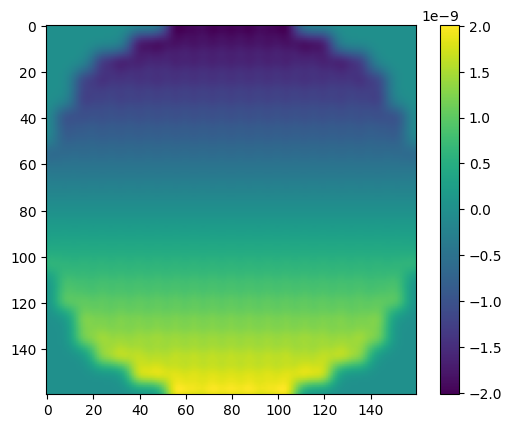

In [29]:
n = 0

# input_modes = np.random.randn(1)*1e-9
input_modes = 1e-9
print(input_modes)
dm_fried.coefs = M2C_KL[:,n] * input_modes

plt.imshow(dm_fried.OPD)
plt.colorbar()

In [30]:
tel-atm

1e-09


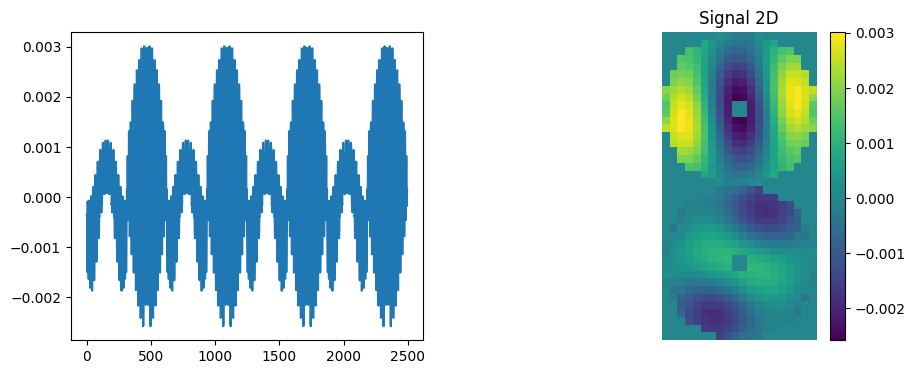

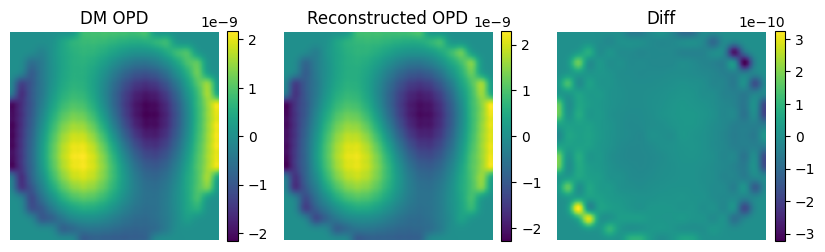

In [31]:
# Tip = 0
# Tilt = 1
# Ast 0 = 2
# Ast 45 = 3
# Foc = 4

n = 7

# input_modes = np.random.randn(1)*1e-9
input_modes = 1e-9
print(input_modes)
# dm_fried.coefs = M2C_KL[:,n] * input_modes
dm_fried.coefs = M2C_KL[:,n] * input_modes

lgsAst**tel*dm_fried*shwfs


signal = [np.zeros(shwfs.signal[0].shape)]*n_lgs

for i in range(n_lgs):
    signal[i][:int(len(shwfs.signal[0])/2)] = shwfs.signal[i][int(len(shwfs.signal[0])/2):]
    signal[i][int(len(shwfs.signal[0])/2):] = shwfs.signal[i][:int(len(shwfs.signal[0])/2)]

shwfs.signal = np.hstack(signal)



shwfs.signal = np.hstack(shwfs.signal)
# shwfs.signal = np.flip(shwfs.signal)

# ids_p = np.where(tel.pupil>0)
# ids = (ids_p[1], ids_p[0])
# shwfs.signal = wfsG @ lgsAst.OPD[0][ids] * 2 * np.pi / lgsAst.wavelength

# fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# axes[0].plot(dm_fried.coefs)

# axes[1].plot(shwfs.signal)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(shwfs.signal)
axes[1].set_title(f'Signal')


im = axes[1].imshow(shwfs.signal_2D[0])
axes[1].axis('off')
axes[1].set_title(f'Signal 2D')
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)



fig, axes = plt.subplots(1, 3, figsize=(10, 6))

dm_OPD = dm_fried.OPD
im = axes[0].imshow(dm_OPD)
axes[0].axis('off')
axes[0].set_title(f'DM OPD')
fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)


rec_OPD = (dm_fried.modes@reconstructor@shwfs.signal).reshape((tel.resolution, tel.resolution))#.T


im = axes[1].imshow(rec_OPD)
axes[1].axis('off')
axes[1].set_title(f'Reconstructed OPD')
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

im = axes[2].imshow((dm_fried.OPD-rec_OPD))
axes[2].axis('off')
axes[2].set_title(f'Diff')
fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

In [32]:
# stop

In [33]:
# aaaaa

In [34]:
# plt.imshow(shwfs_geom.signal_2D[0])

In [35]:
# plt.spy(rec.Gamma)

In [36]:
# reconstructor.shape[1]/4

In [37]:
# plt.imshow(reconstructor[:, :624])

In [38]:
# rec_OPD = np.array(rec.Reconstructor[0] @ shwfs.signal)
# plt.plot(rec_OPD[0])

In [39]:
# plt.spy(rec.Gamma)

In [40]:
# plt.imshow(rec.unfiltered_subap_mask)

In [41]:
# ramp = tomoAO.tools.tomography_tools.meshgrid(rec.gridMask[0].shape[0], tel.D, offset_x=0.0, offset_y=0.0, stretch_x=1, stretch_y=1)

In [42]:
# # Tip

# tip = ramp[0]




# fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# fig.suptitle(f'Tip')
# im = axes[0].imshow(tip)
# fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)


# ids_p  = np.where(rec.gridMask[0])
# ids = (ids_p[1], ids_p[0])

# axes[1].plot(tip[ids])


# signal_tip = np.array(rec.Gamma @ tip[ids]).flatten()

# axes[2].plot(signal_tip)


In [43]:
# # Tilt

# tilt = ramp[0].T

# ids_p  = np.where(rec.gridMask[0])
# ids = (ids_p[1], ids_p[0])

# signal_tilt = np.array(rec.Gamma @ tilt[ids]).flatten()


# fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# fig.suptitle(f'Tilt')
# im = axes[0].imshow(tilt)
# fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

# axes[1].plot(tilt[ids])

# axes[2].plot(signal_tilt)


In [44]:
# # Ast

# ast = ramp[0]**2 - ramp[0].T**2

# ids_p  = np.where(rec.gridMask[0])
# ids = (ids_p[1], ids_p[0])

# signal_ast = np.array(rec.Gamma @ ast[ids]).flatten()


# fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# fig.suptitle(f'Ast')
# im = axes[0].imshow(ast)
# fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

# axes[1].plot(ast[ids])

# axes[2].plot(signal_ast)


In [45]:
# # Foco

# foco = ramp[0]**2 + ramp[0].T**2

# ids_p  = np.where(rec.gridMask[0])
# ids = (ids_p[1], ids_p[0])

# signal_foco = np.array(rec.Gamma @ foco[ids]).flatten()


# fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# fig.suptitle(f'Foco')
# im = axes[0].imshow(foco)
# fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

# axes[1].plot(foco[ids])

# axes[2].plot(signal_foco)


In [46]:
# # /home/joaomonteiro/Desktop/oopao_test_files/

# import numpy as np
# from scipy.io import savemat


# savemat("/home/joaomonteiro/Desktop/oopao_test_files/ramp.mat", {"ramp": ramp[0]})  

# savemat("/home/joaomonteiro/Desktop/oopao_test_files/GammaPython.mat", {"GammaPython": rec.Gamma})  

In [47]:
# plt.imshow(ramp[0]**2)

In [48]:
# plt.imshow(ramp[0]**2+ramp[0].T**2)
# plt.colorbar()

In [49]:
# plt.imshow(ramp[0]**2-ramp[0].T**2)

In [50]:
# plt.plot(shwfs_geom.signal)

In [51]:
# # Foc
# mode = ramp[0]**2+ramp[0].T**2
# tmp = np.array(rec.Gamma @ mode[np.where(rec.gridMask[0])])
# plt.plot(tmp.flatten())

In [52]:
# mode = ramp[0]**2-ramp[0].T**2
# tmp = np.array(rec.Gamma @ mode[np.where(rec.gridMask[0])])
# plt.plot(tmp.flatten())

In [53]:
# tmp = np.array(rec.Gamma @ ramp[0][np.where(rec.gridMask[0])])
# plt.plot(tmp.flatten())

In [54]:
# plt.spy(rec.Gamma)

In [55]:
# plt.imshow(shwfs_geom.signal_2D[0])
# plt.colorbar()

In [56]:
# plt.plot(shwfs_geom.signal)

In [57]:
# plt.imshow(rec.Gamma)

In [58]:
# plt.imshow(rec.Reconstructor[0])

In [59]:
# np.max(rec.noise_covariance)

In [60]:
# rec.noise_covariance.shape

In [61]:
# plt.imshow(rec.noise_covariance)

In [62]:
# np.max(np.diag(rec.noise_covariance))

In [63]:
# plt.imshow(rec.noise_covariance)

In [64]:
# iFittingMatrix_f = 2*rec.dm.modes[rec.outputRecGrid.flatten("F"),]
# iFittingMatrix = 2*rec.dm.modes[rec.outputRecGrid.flatten(),]

# print(iFittingMatrix.shape)

# plt.imshow(np.linalg.pinv(iFittingMatrix, rcond=1e-3))
# plt.colorbar()

In [65]:
# plt.imshow(rec.Reconstructor[0])
# plt.colorbar()

In [66]:
# stop

In [67]:
# n = 1

# # input_modes = np.random.randn(1)*1e-9
# input_modes = 1e-9
# print(input_modes)
# dm_fried.coefs = M2C_KL[:,n] * input_modes

# lgsAst**tel*dm_fried*shwfs


# signal = [np.zeros(shwfs.signal[0].shape)]*n_lgs

# for i in range(n_lgs):
#     signal[i][:int(len(shwfs.signal[0])/2)] = shwfs.signal[i][int(len(shwfs.signal[0])/2):]
#     signal[i][int(len(shwfs.signal[0])/2):] = shwfs.signal[i][:int(len(shwfs.signal[0])/2)]

# signal = np.hstack(signal)
# shwfs.signal = signal

# wfsSignal = shwfs.signal


# lgsAst**tel*dm_fried*shwfs_geom

# wfsSignal_geom = shwfs_geom.signal 
# signal_tmp = wfsSignal_geom.copy()
# for k in range(n_lgs):
#     wfsSignal_geom[k][:int(len(shwfs_geom.signal[0])/2)] = signal_tmp[k][int(len(shwfs_geom.signal[0])/2):]
#     wfsSignal_geom[k][int(len(shwfs_geom.signal[0])/2):] = signal_tmp[k][:int(len(shwfs_geom.signal[0])/2)]
# wfsSignal_geom=np.hstack(wfsSignal_geom)

# m = np.mean(wfsSignal_geom/wfsSignal)
# print(m)





# fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# axes[0, 0].plot(wfsSignal_geom[:624])
# axes[0, 0].set_title(f'wfsSignal_geom')

# axes[0, 1].plot(wfsSignal[:624])
# axes[0, 1].set_title(f'wfsSignal')

# axes[0, 2].plot(wfsSignal_geom[:624]-wfsSignal[:624])
# axes[0, 2].set_title(f'Signal Diff')

# N = 0

# dm_OPD = dm_fried.OPD
# im = axes[1, 0].imshow(dm_OPD)
# axes[1, 0].axis('off')
# axes[1, 0].set_title(f'lgsAst OPD')
# fig.colorbar(im, ax=axes[1, 0], fraction=0.046, pad=0.04)

# wfsSignal = wfsSignal_geom-imat_geom@dm_fried.coefs

# rec_OPD = (dm_fried.modes@reconstructor@wfsSignal).reshape((tel.resolution, tel.resolution))

# im = axes[1, 1].imshow(rec_OPD)
# axes[1, 1].axis('off')
# axes[1, 1].set_title(f'Reconstructed OPD')
# fig.colorbar(im, ax=axes[1, 1], fraction=0.046, pad=0.04)


# im = axes[1, 2].imshow((dm_fried.OPD-rec_OPD))
# axes[1, 2].axis('off')
# axes[1, 2].set_title(f'Diff')
# fig.colorbar(im, ax=axes[1, 2], fraction=0.046, pad=0.04)



In [68]:
reconstructor_ast = reconstructor.copy()
np.save('/home/joaomonteiro/Desktop/oopao_test_files/reconstructor_ast.npy', reconstructor_ast)


In [69]:
# # reconstructor_ast / reconstructor_single
# rec_type = "ast"

# if rec_type == "ast":
#     reconstructor = reconstructor_ast
# else:
#     reconstructor = reconstructor_single


# from scipy.linalg import block_diag

# wfsG_mat_data = loadmat('/home/joaomonteiro/Desktop/oopao_test_files/WfsG.mat')

# wfsG_mat_single = np.array(wfsG_mat_data['wfsG_mat'].todense())

# if n_lgs == 1:
#     wfsG_mat = wfsG_mat_single
# else:
#     wfsG_mat = block_diag(*[wfsG_mat_single]*n_lgs)


-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   640   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 2.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann
Updating the Atmosphere 

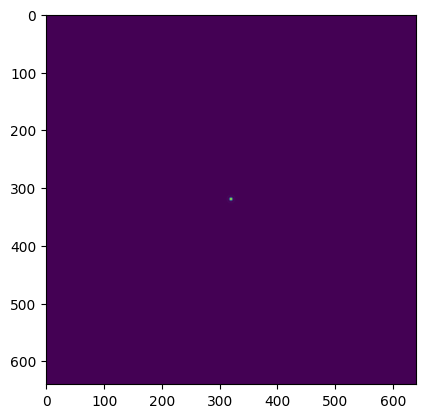

In [80]:
from OOPAO.Detector import Detector

src_cam = Detector(tel.resolution*4)
src_cam.psf_sampling = 4
src_cam.integrationTime = tel.samplingTime*1
# put the scientific target off-axis to simulate anisoplanetism (set to  [0,0] to remove anisoplanetism)
# src.coordinates = [0.4,0]

# atm.generateNewPhaseScreen(seed = 10)

# Define a scientific source:
SciSrc = Source(optBand='H', magnitude=0)

# tel.resetOPD()  # initialize Telescope
lgsAst.resetOPD()

dm = dm_fried
dm.coefs = 0      # initialize DM commands
lgsAst.print_optical_path()

atm.r0 = 0.16

tel+atm # combine tel and atm to enable turbulence

# tel.computePSF(4)

# initialize DM commands
# SciSrc**tel*dm*shwfs
SciSrc**tel*dm*src_cam

SciSrc.print_optical_path()

nLoop = 50

# allocate memory to save data
SR                      = np.zeros(nLoop)
total                   = np.zeros(nLoop)
residual                = np.zeros(nLoop)
wfsSignal               = np.arange(0,shwfs.nSignal*n_lgs)*0

# loop parameters
# gainCL                  = config_vars["gainPol"]
gainCL                  = 0.8
display                 = True


# reconstructor = np.array(rec.R_unfiltered)
# reconstructor = reconstructor * lgsAst.src[0].wavelength / 2 / (tel.D/20) / 5
# reconstructor = reconstructor*4

tel-atm
SciSrc**tel*dm*src_cam
plt.imshow(src_cam.frame)
plt.show()
src_cam.reference_frame = src_cam.frame.copy()
tel+atm



In [75]:
# dm.coefs = eye(dm.nValidActuator)*ngs.wavelength/2/pi;
# ngs = ngs.*tel*dm*wfsG;
# Dgeom = wfsG.slopes*2*pi/ngs.wavelength;
# calibDm.D = Dgeom;

from tqdm import tqdm


calib_src = Source('Na', 0)

if config_vars["loop_mode"] == 'closed':
    dm_eye = np.eye(dm_fried.nValidAct)
    imat_geom = np.zeros((shwfs_geom.nValidSubaperture*2, dm_fried.nValidAct)) 
    tel-atm
    for i_act in tqdm(range(dm_fried.nValidAct)):
        dm_fried.coefs = dm_eye[:, i_act]*calib_src.wavelength/2/np.pi
        calib_src**tel*dm_fried*shwfs_geom
        imat_geom[:, i_act] = shwfs_geom.signal

    imat_geom = imat_geom*2*np.pi/calib_src.wavelength    
    imat_tmp = imat_geom.copy()
    imat_geom[:shwfs_geom.nValidSubaperture, :] = imat_tmp[shwfs_geom.nValidSubaperture:, :]
    imat_geom[shwfs_geom.nValidSubaperture:, :] = imat_tmp[:shwfs_geom.nValidSubaperture, :]


    imat_geom = np.vstack([imat_geom]*n_lgs)

    tel+atm

# if config_vars["loop_mode"] == 'closed':
#     dm_eye = np.eye(dm_fried.nValidAct)
#     imat = np.zeros((shwfs.nValidSubaperture*2, dm.nValidAct)) 
#     tel-atm
#     for i_act in tqdm(range(dm.nValidAct)):
#         dm.coefs = dm_eye[:, i_act]*calib_src.wavelength/2/np.pi
#         calib_src**tel*dm*shwfs
#         imat[:, i_act] = shwfs.signal

#     imat = imat*2*np.pi/calib_src.wavelength    
#     imat_tmp = imat.copy()
#     imat[:shwfs.nValidSubaperture, :] = imat_tmp[shwfs.nValidSubaperture:, :]
#     imat[shwfs.nValidSubaperture:, :] = imat_tmp[:shwfs.nValidSubaperture, :]


#     imat = np.vstack([imat]*n_lgs)

#     tel+atm



------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------



100%|██████████| 356/356 [00:05<00:00, 66.68it/s]


Using OOPAO wfs
Running closed loop


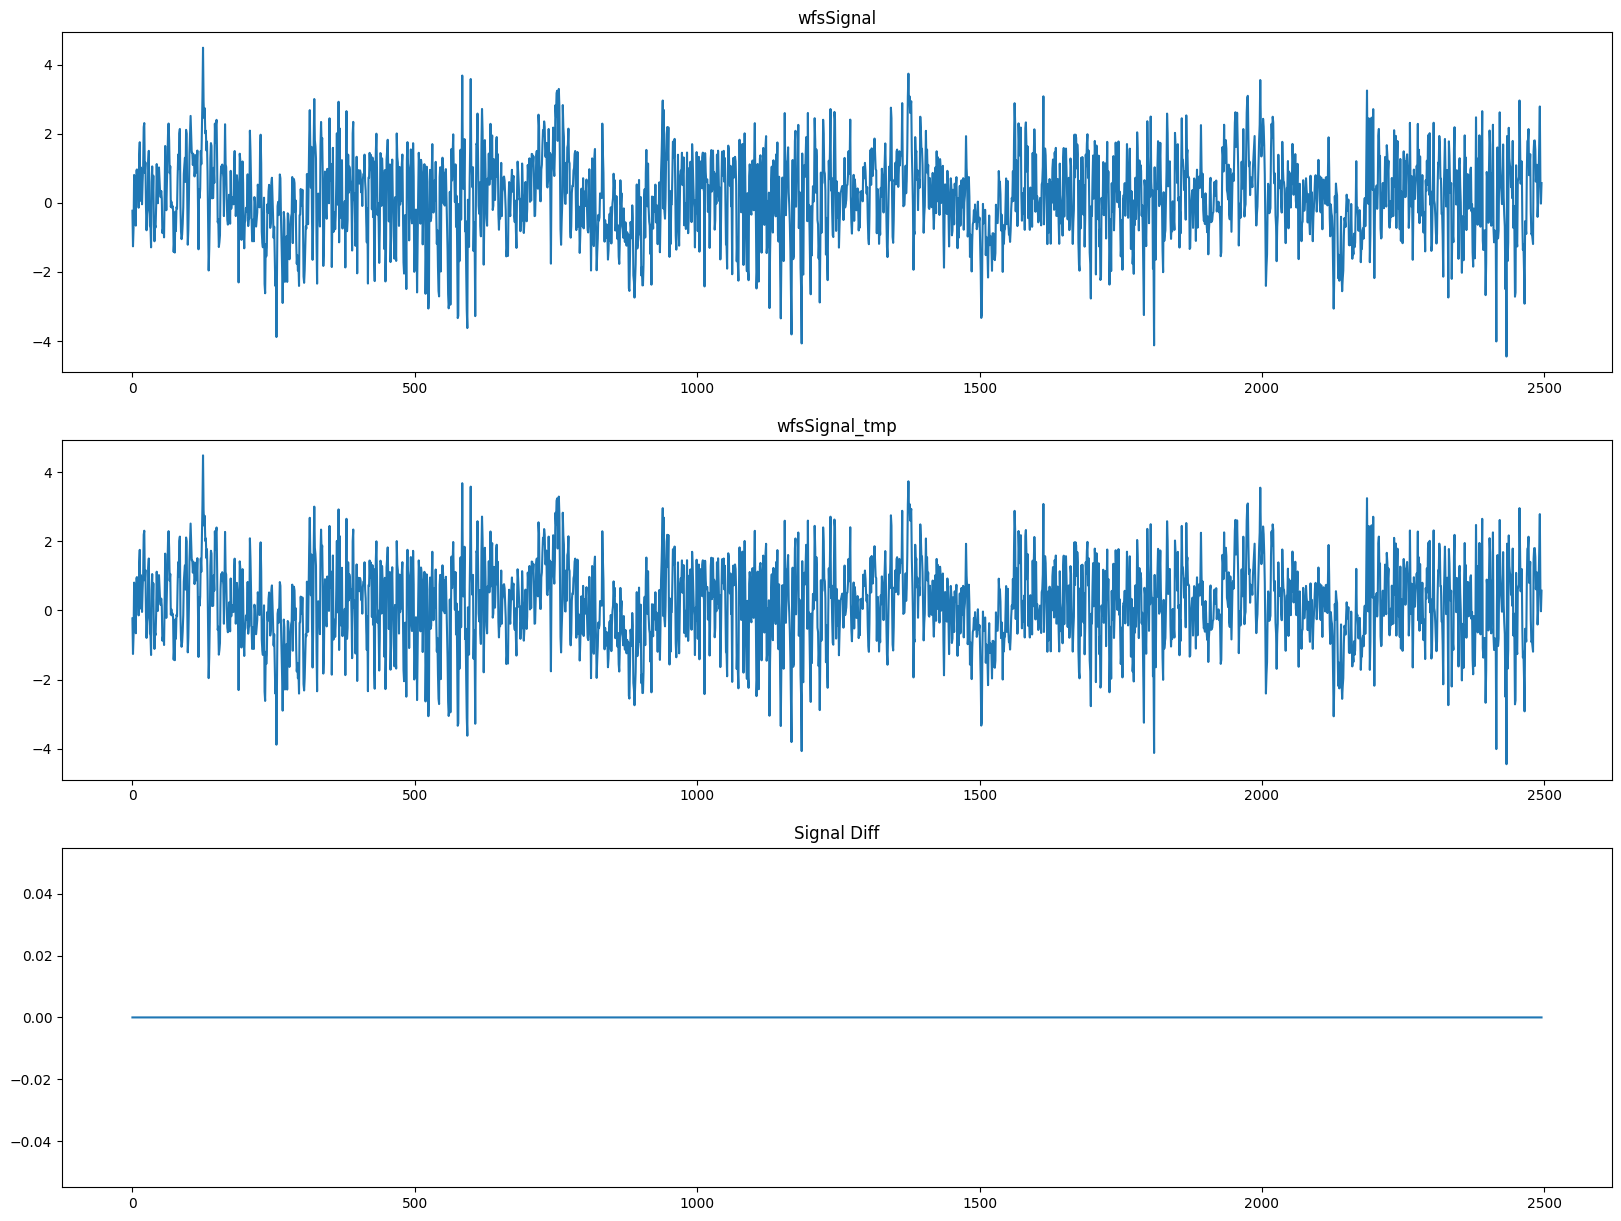

Loop0/50 AO residual: 227.5340940706256 nm


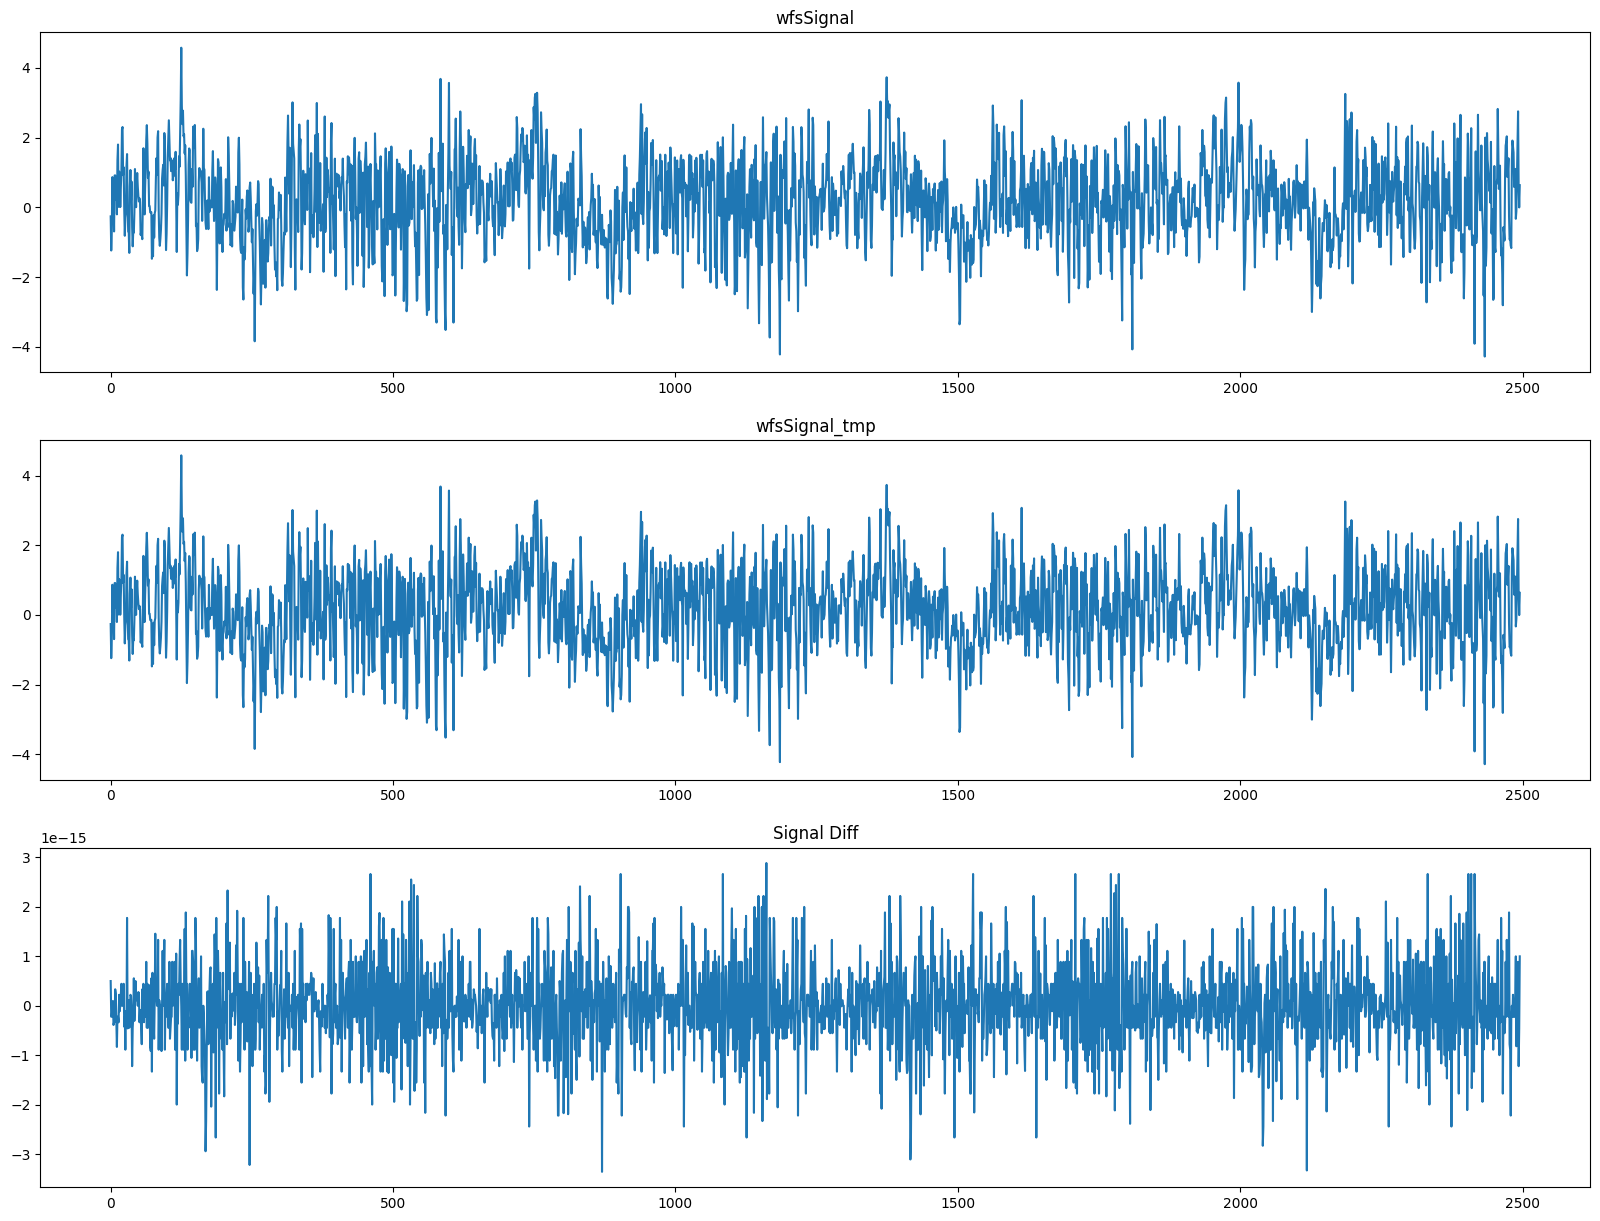

Loop1/50 AO residual: 112.25554368840177 nm


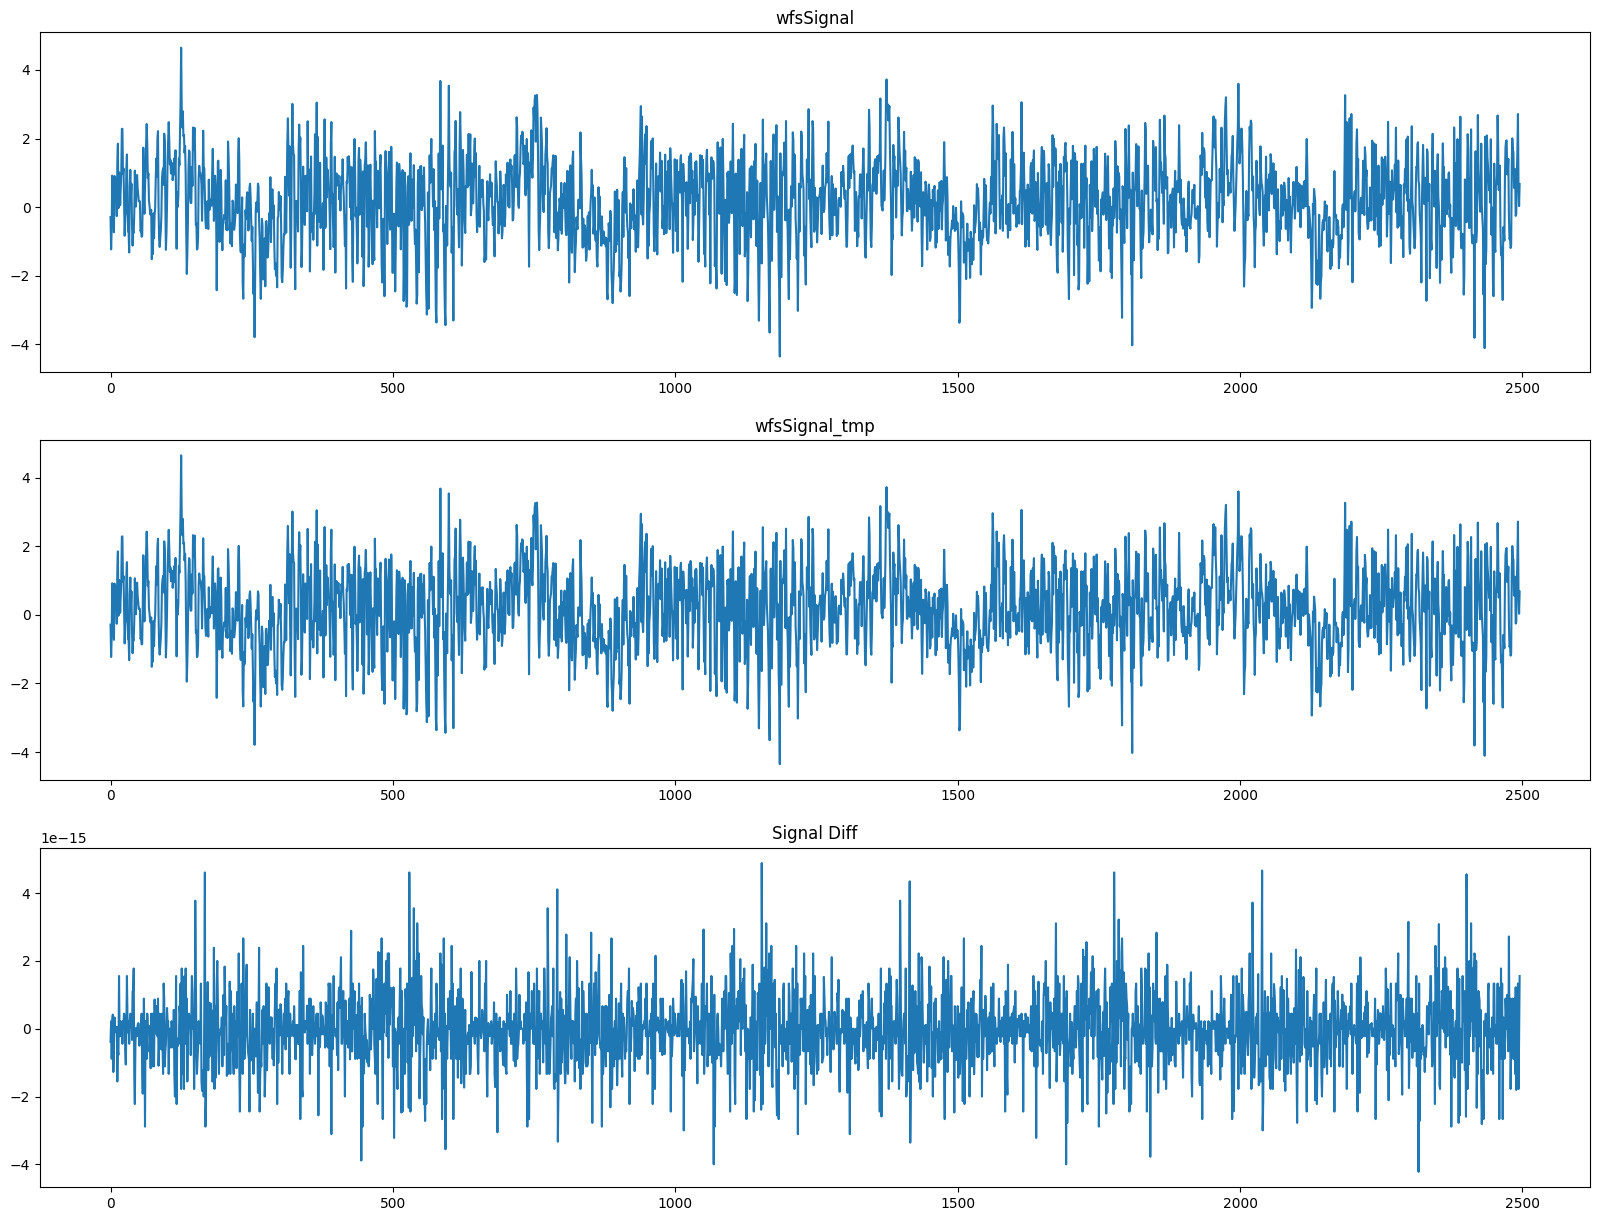

Loop2/50 AO residual: 106.34302605334318 nm


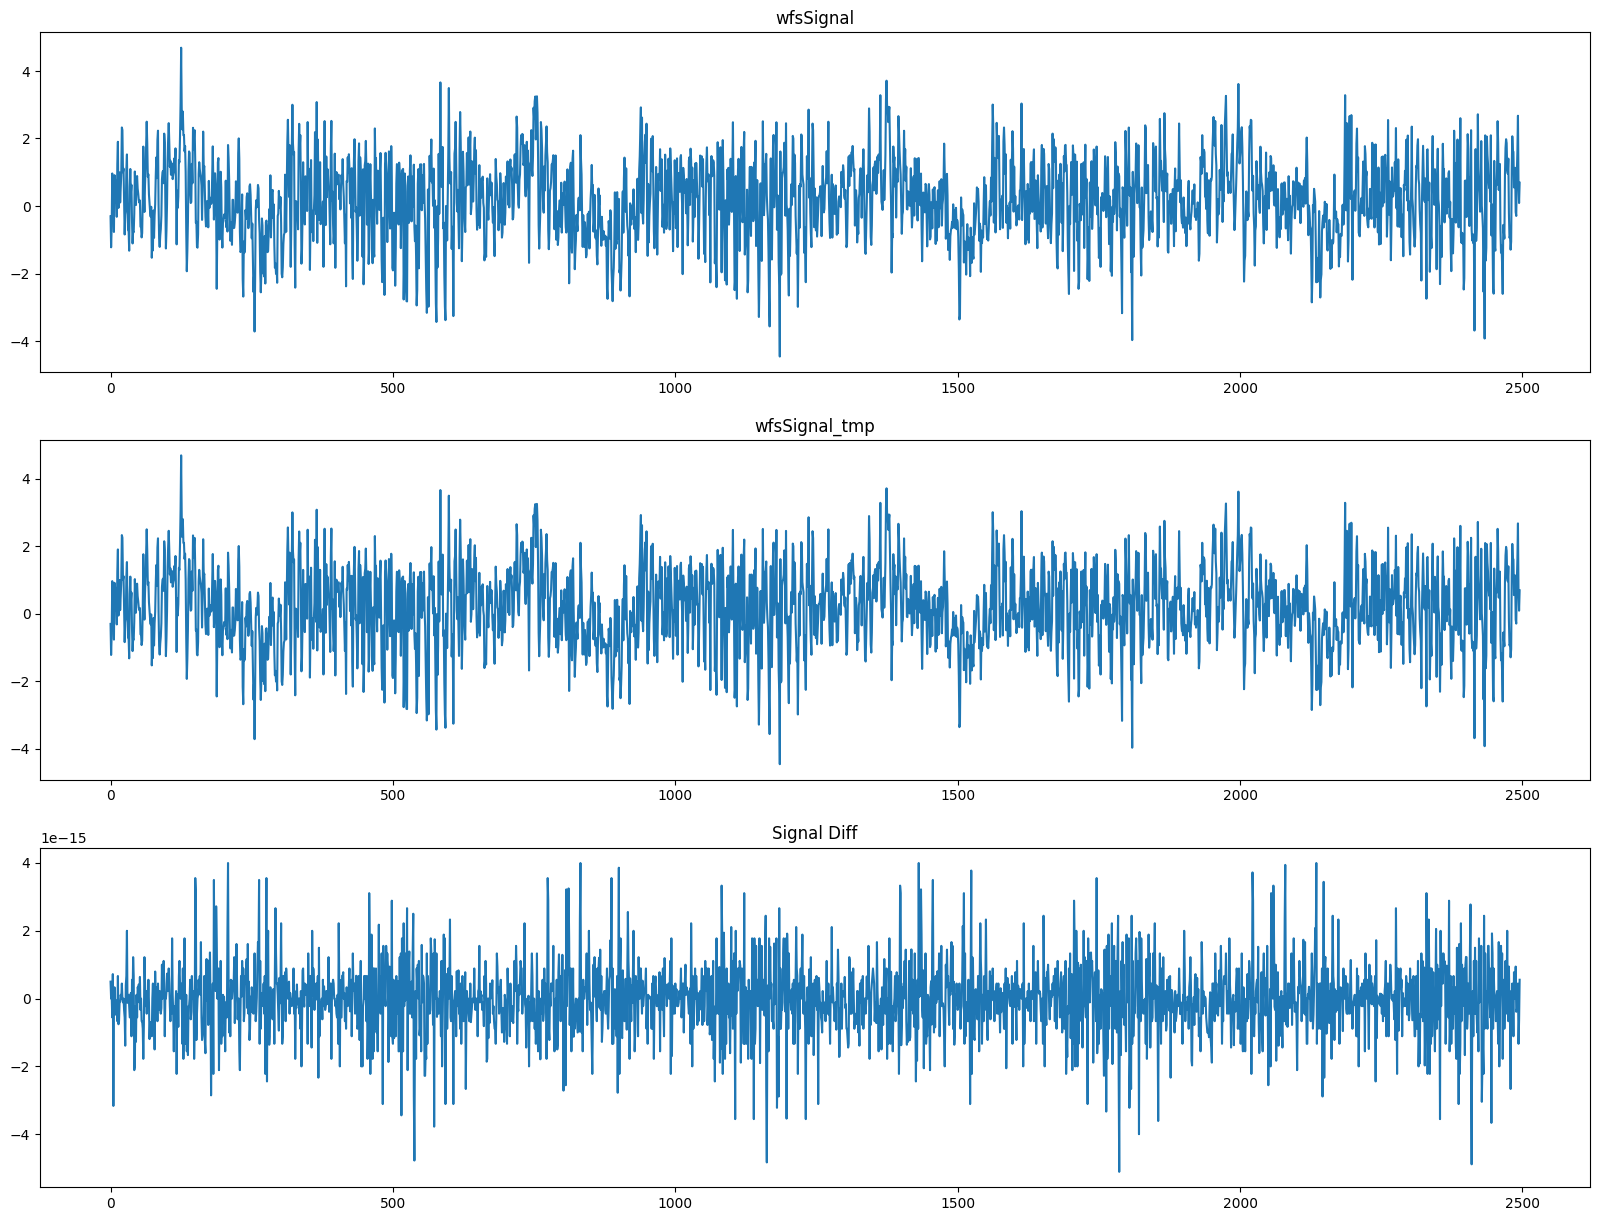

Loop3/50 AO residual: 106.18163024576998 nm


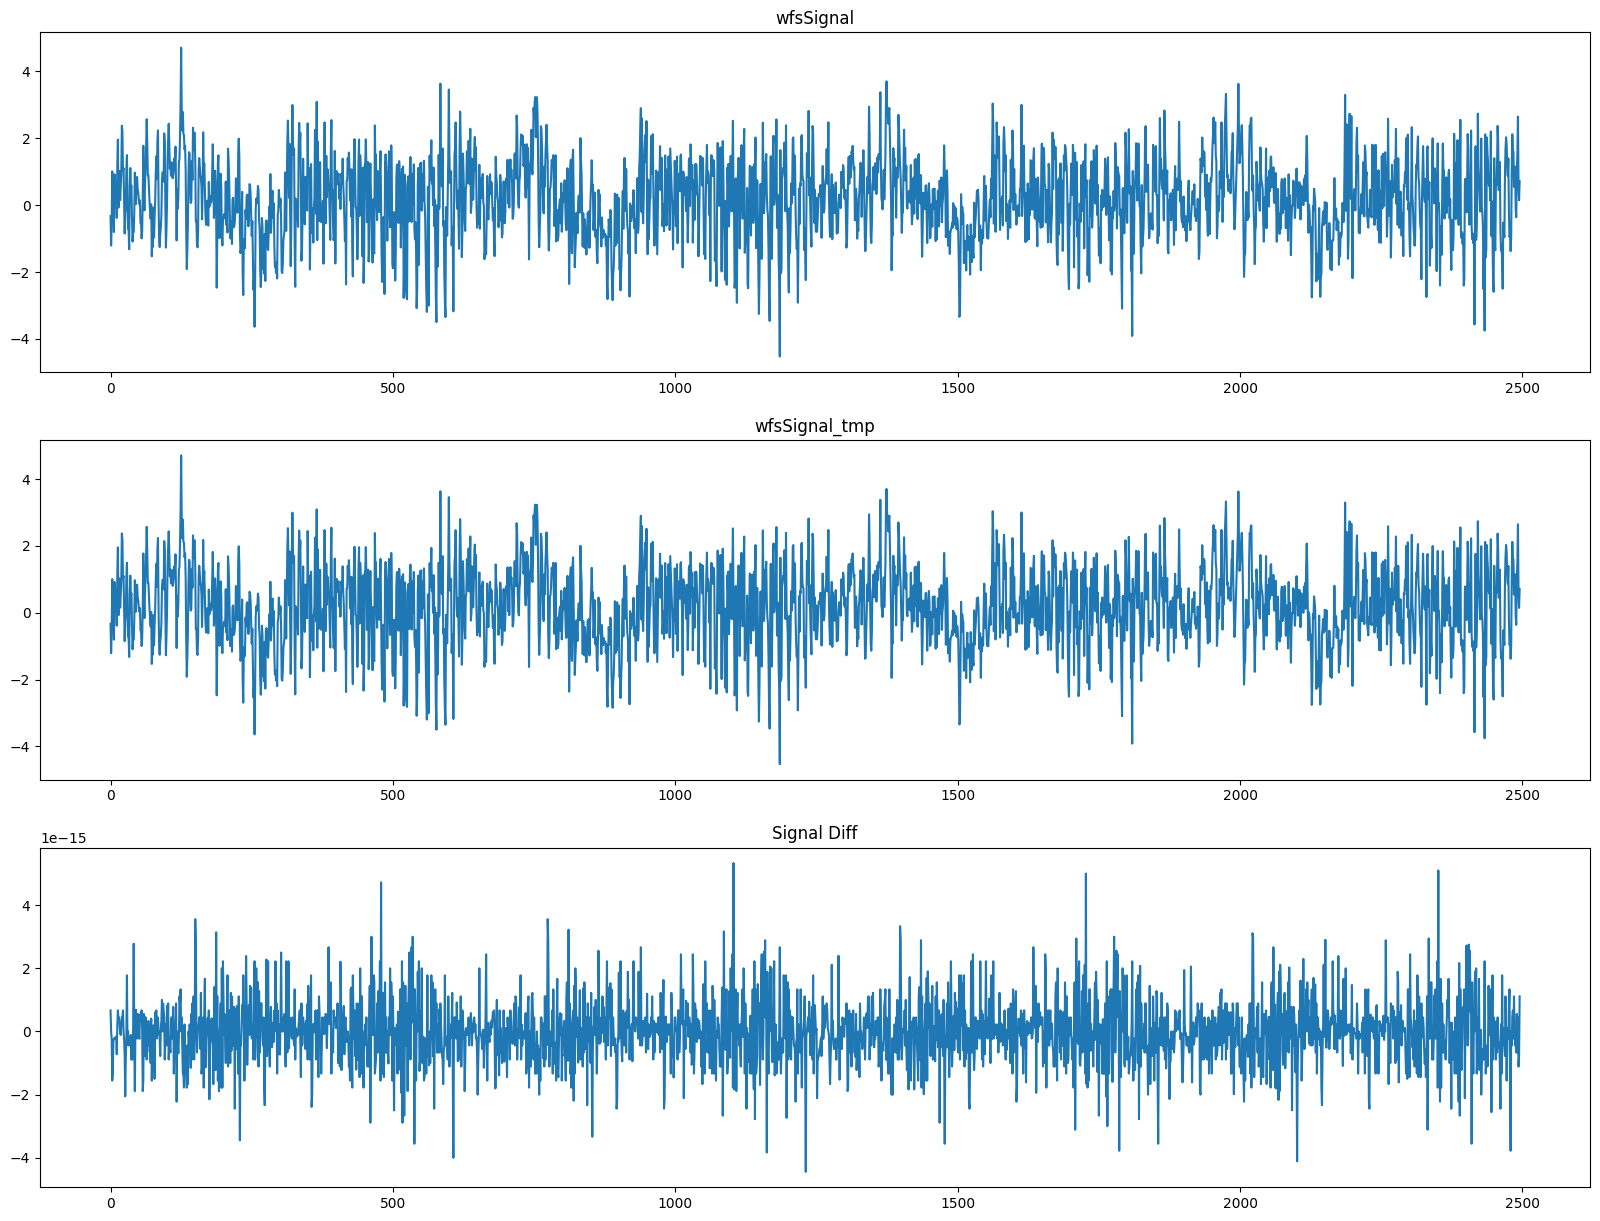

Loop4/50 AO residual: 106.36385595791195 nm


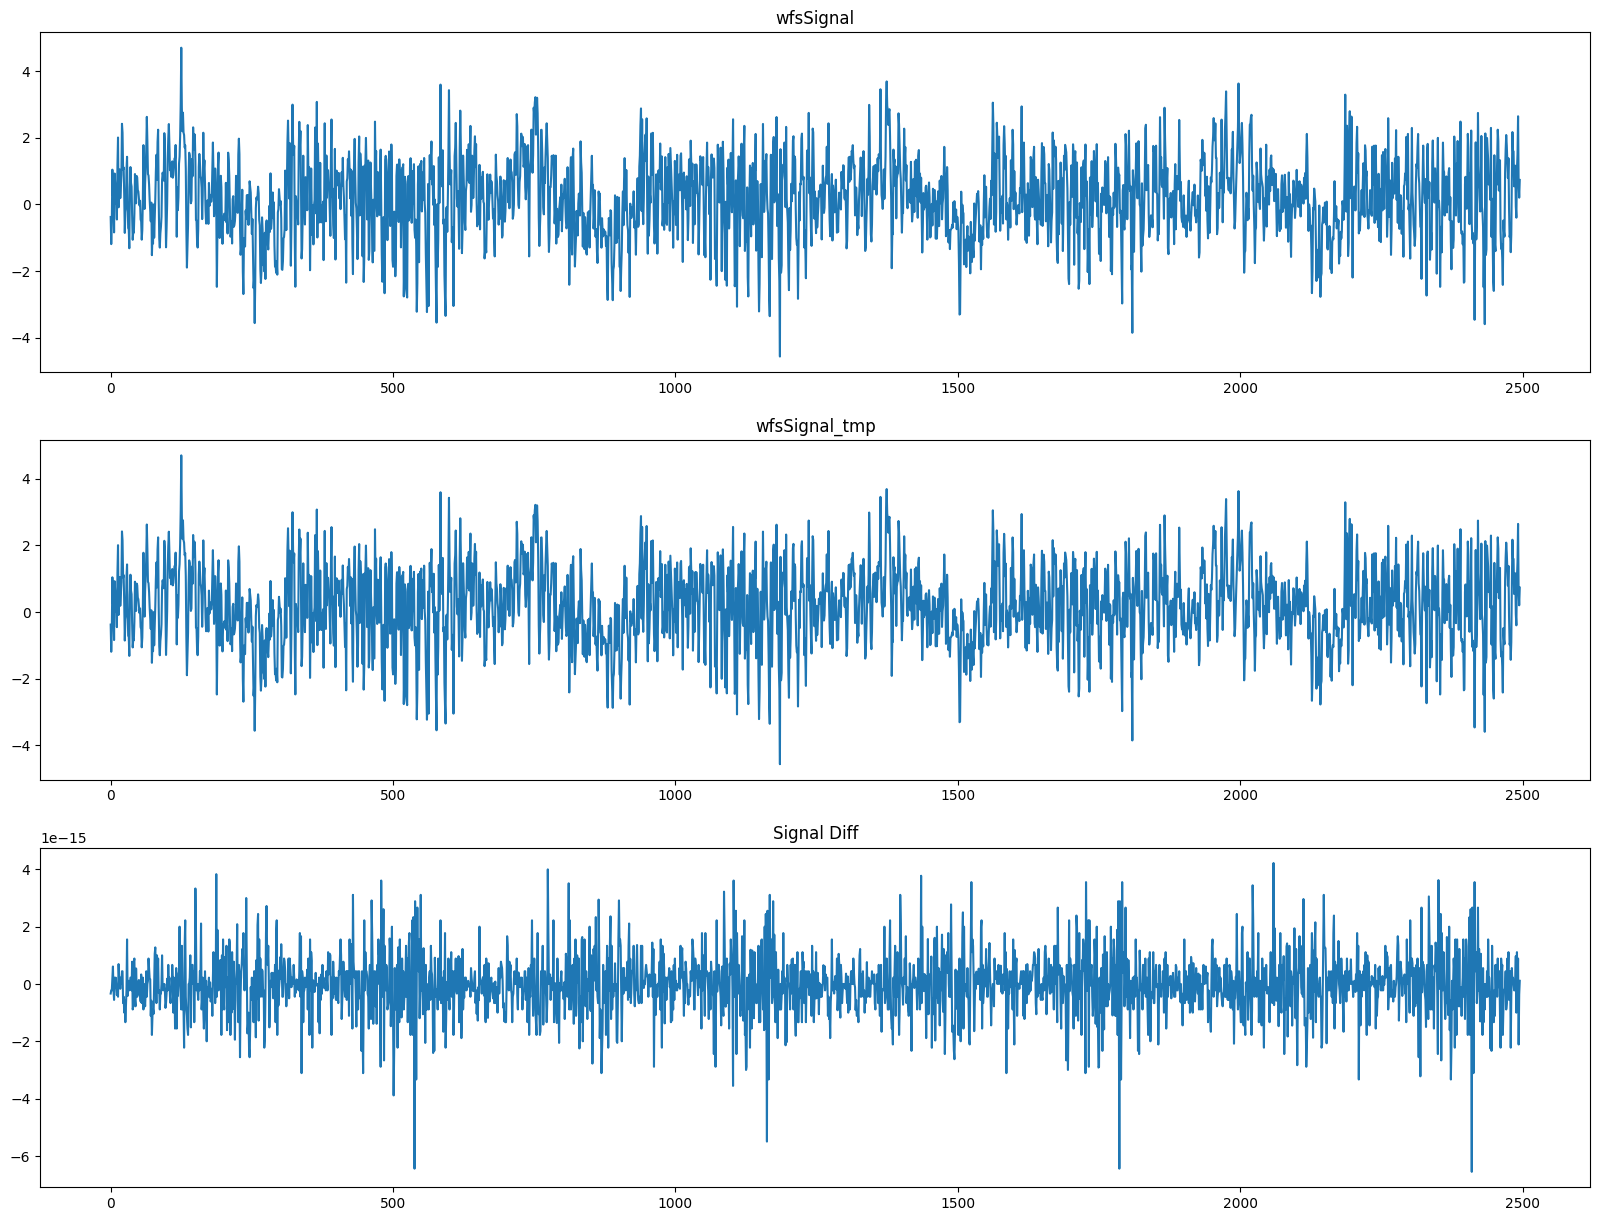

Loop5/50 AO residual: 106.42714123539099 nm


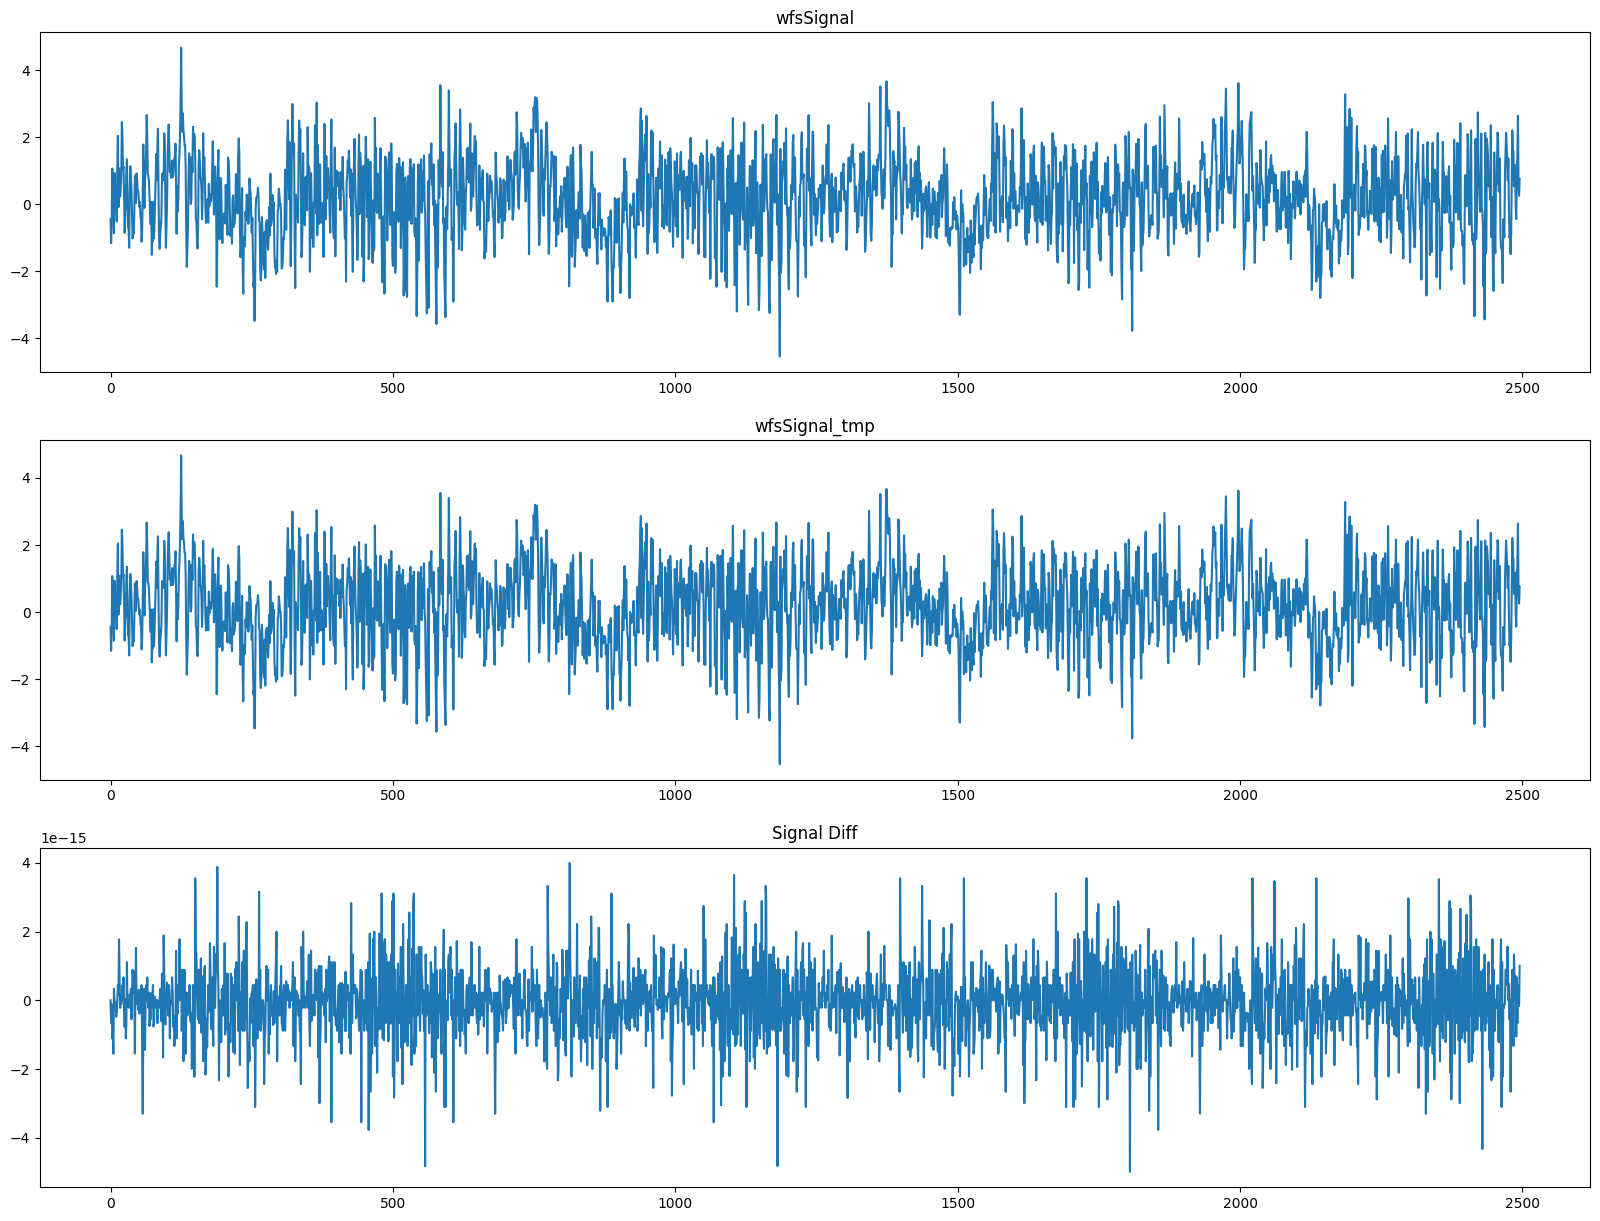

Loop6/50 AO residual: 106.46049820818396 nm


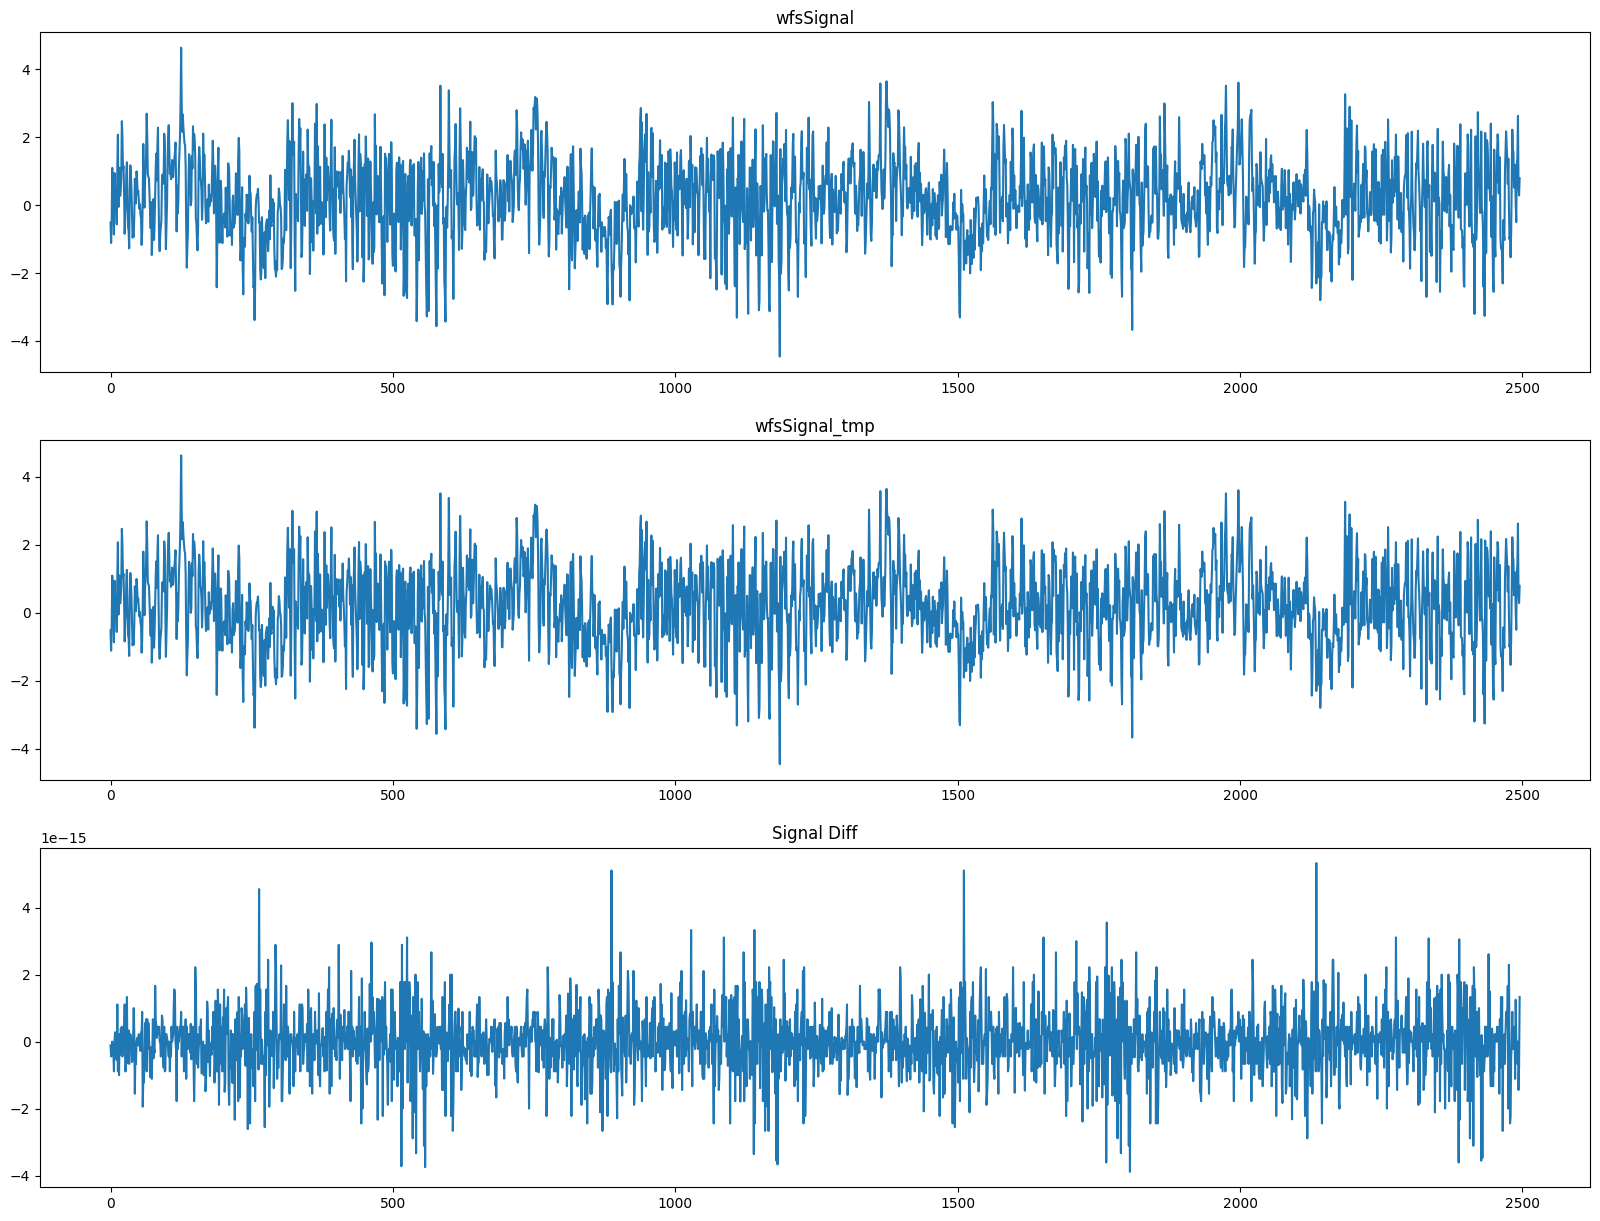

Loop7/50 AO residual: 105.50026873946683 nm


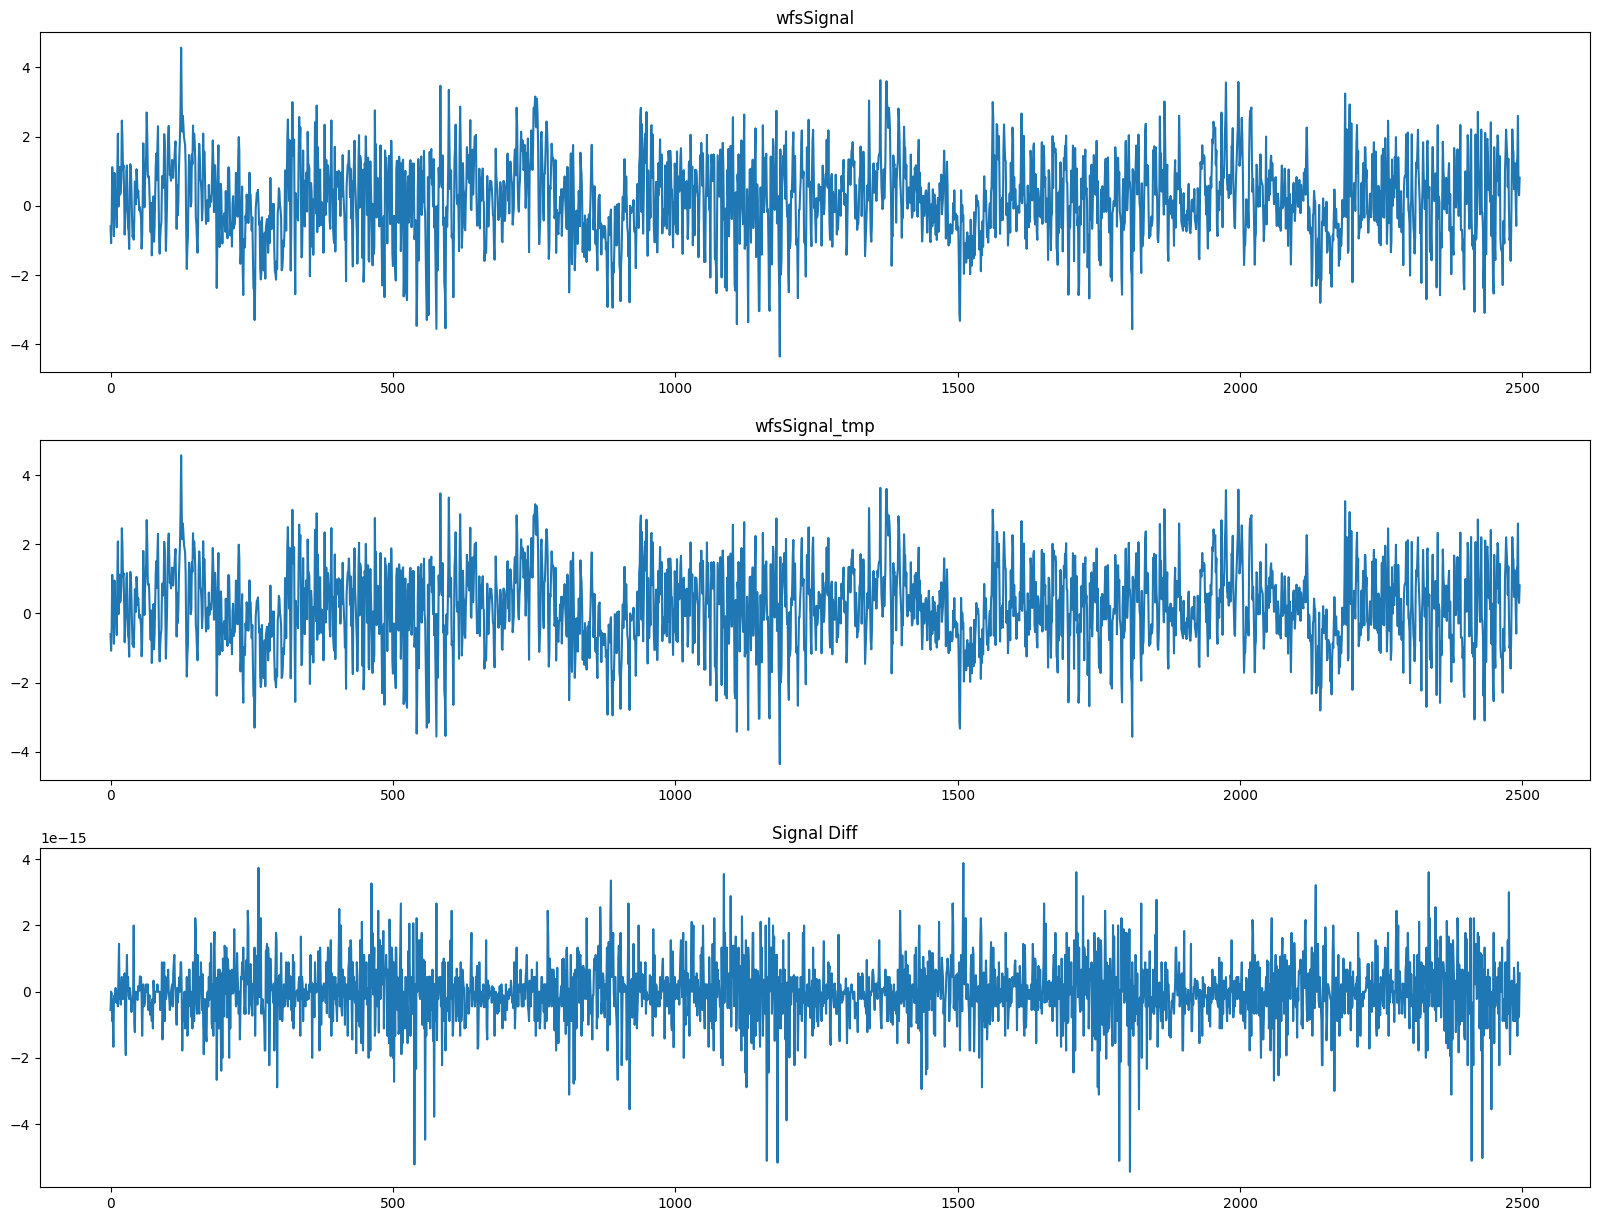

Loop8/50 AO residual: 104.86775933440308 nm


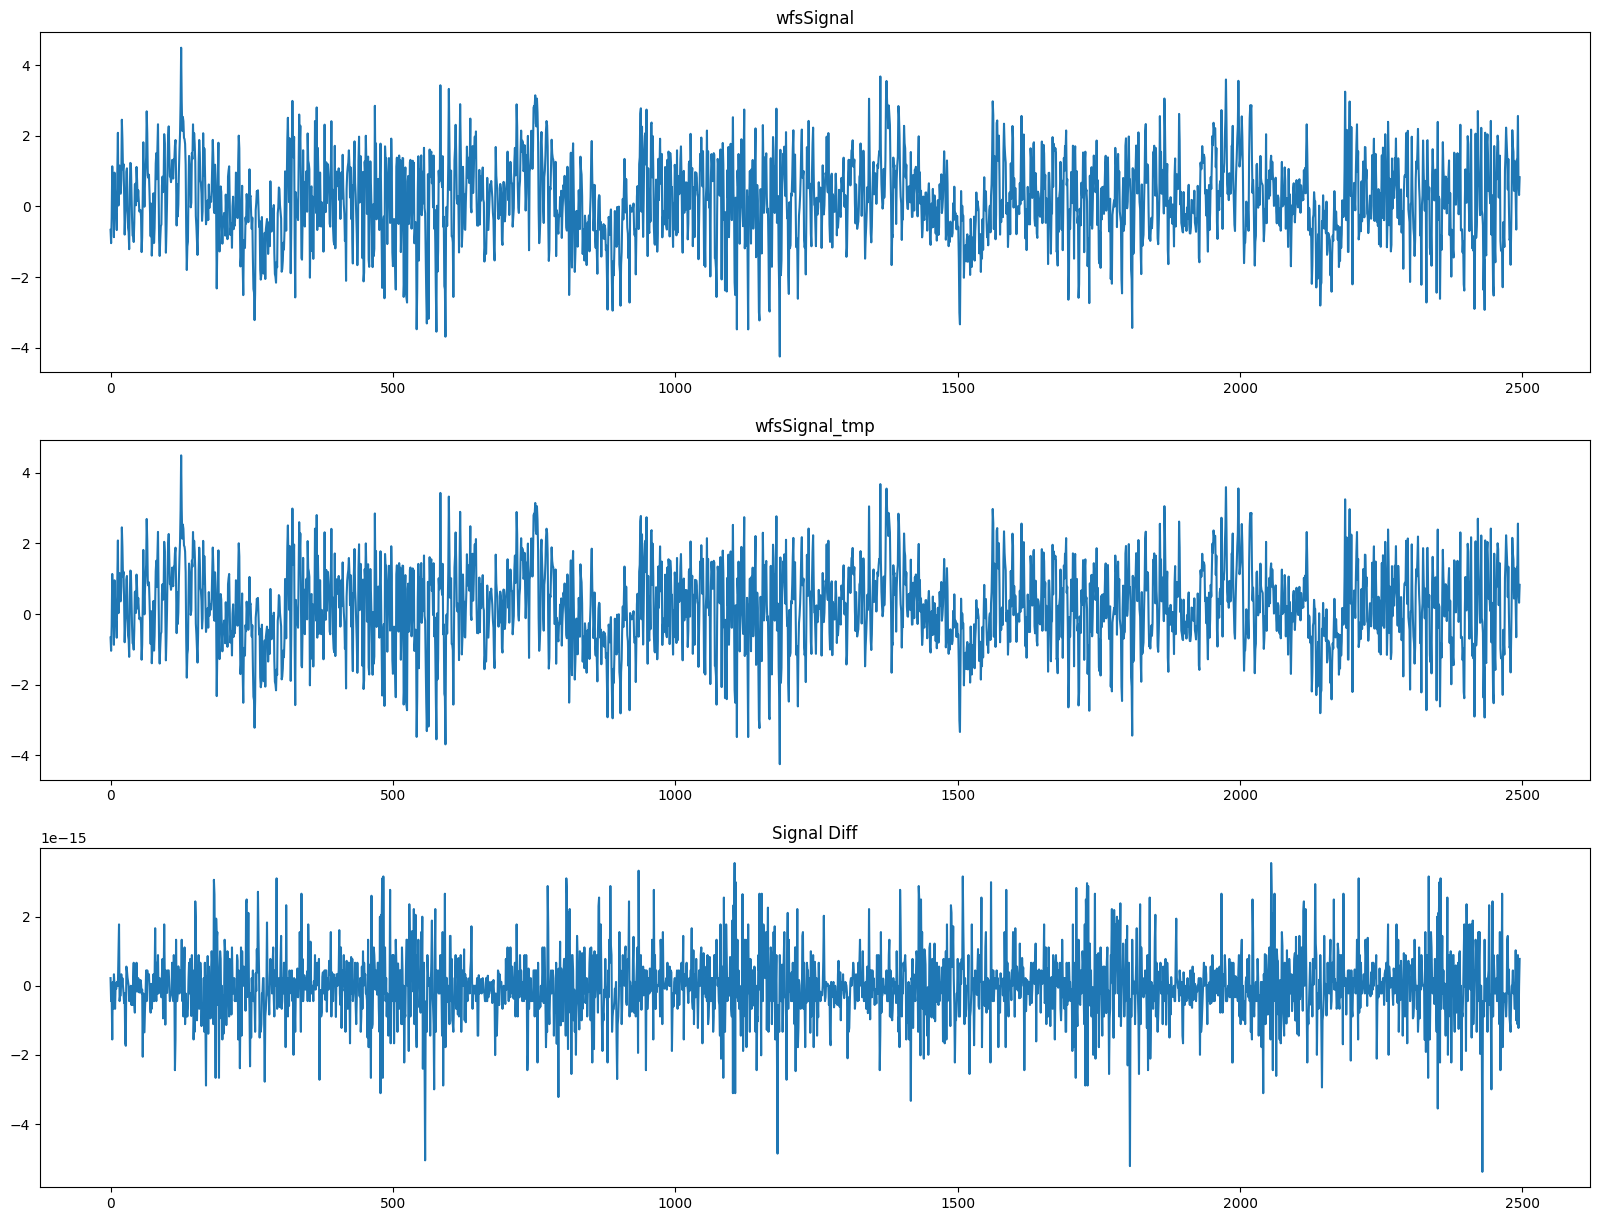

Loop9/50 AO residual: 104.07203219783267 nm


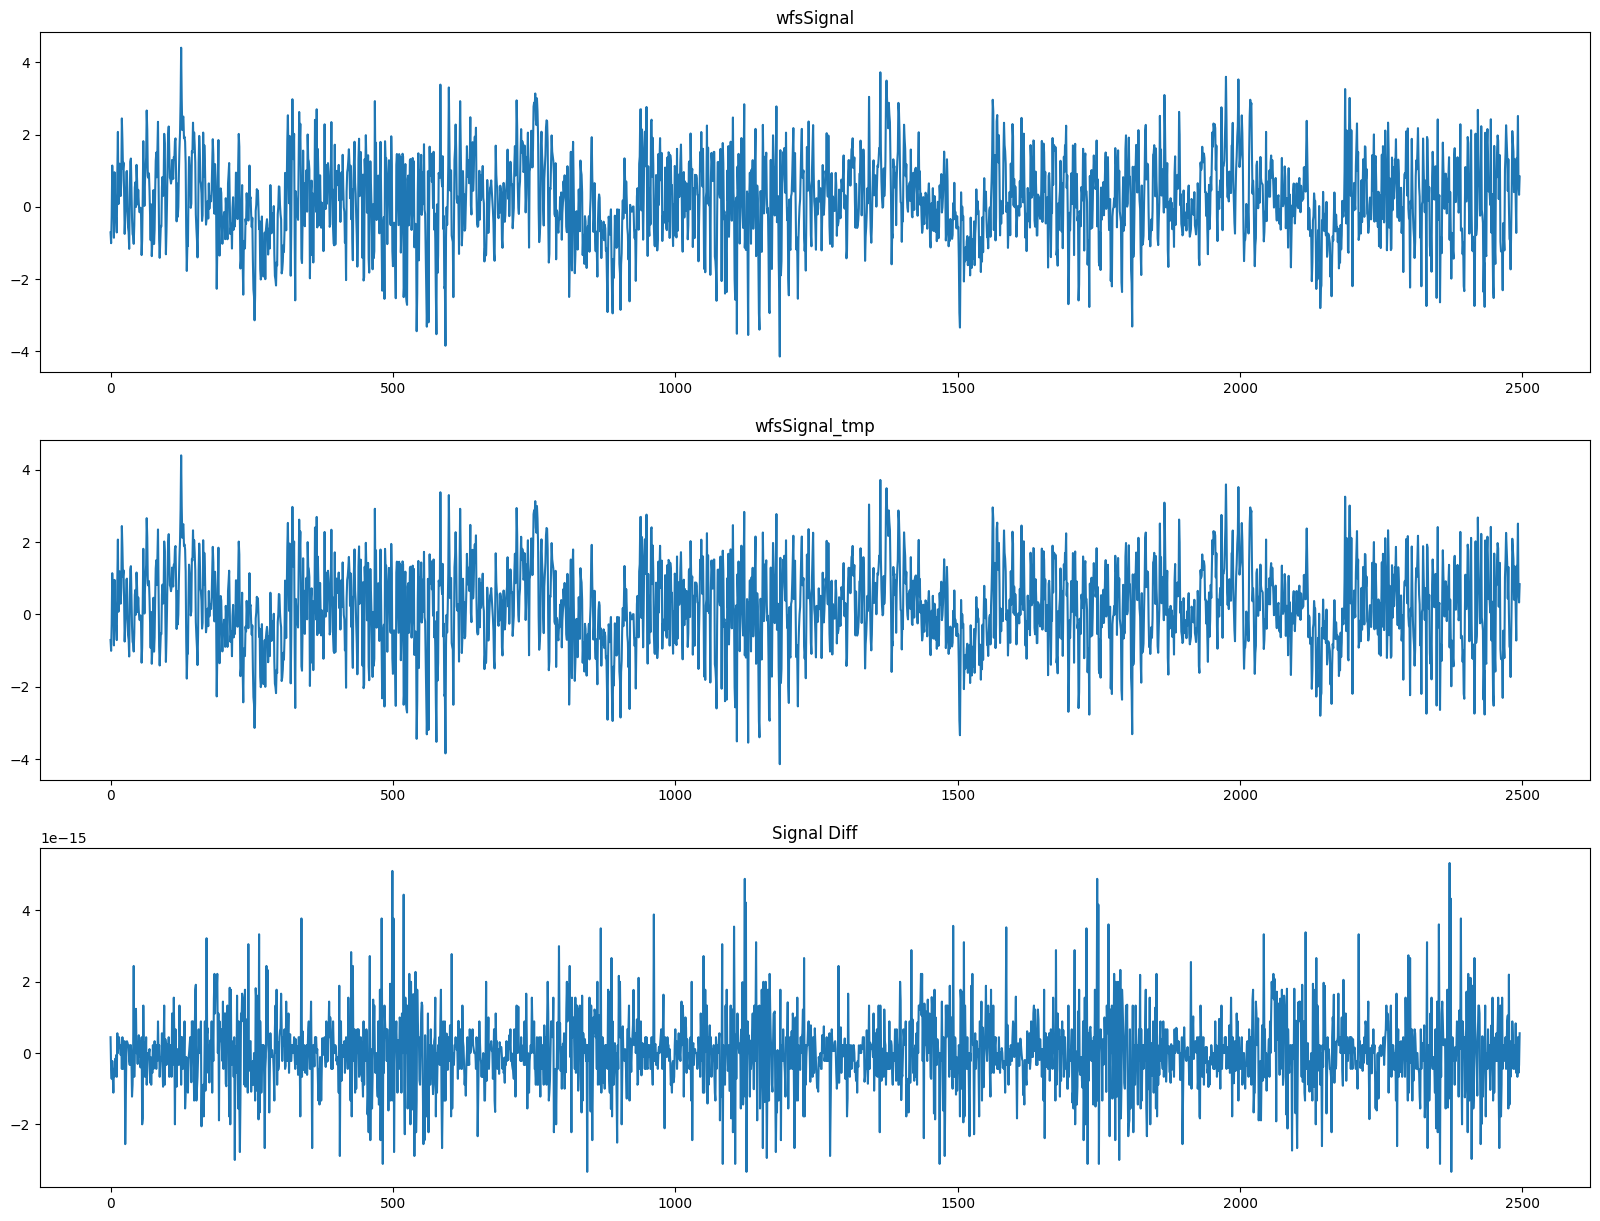

Loop10/50 AO residual: 103.68953957875314 nm


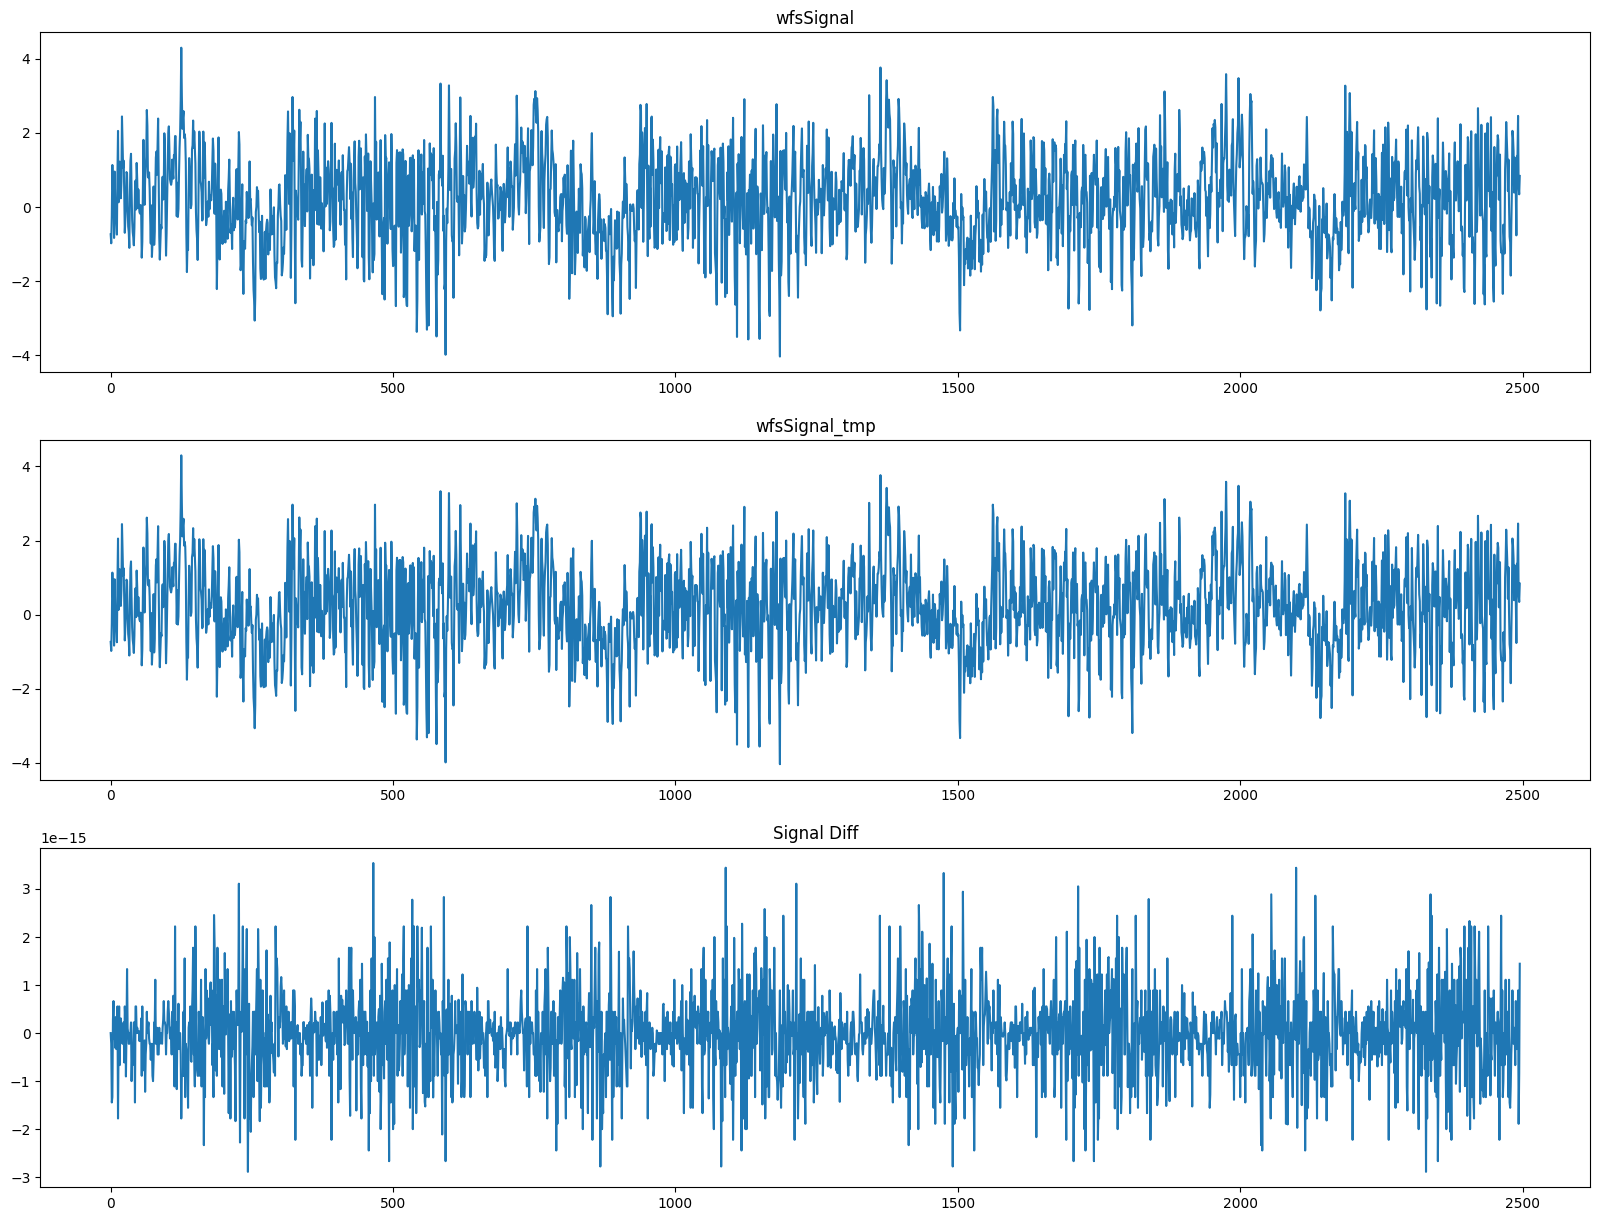

Loop11/50 AO residual: 102.77581002211825 nm


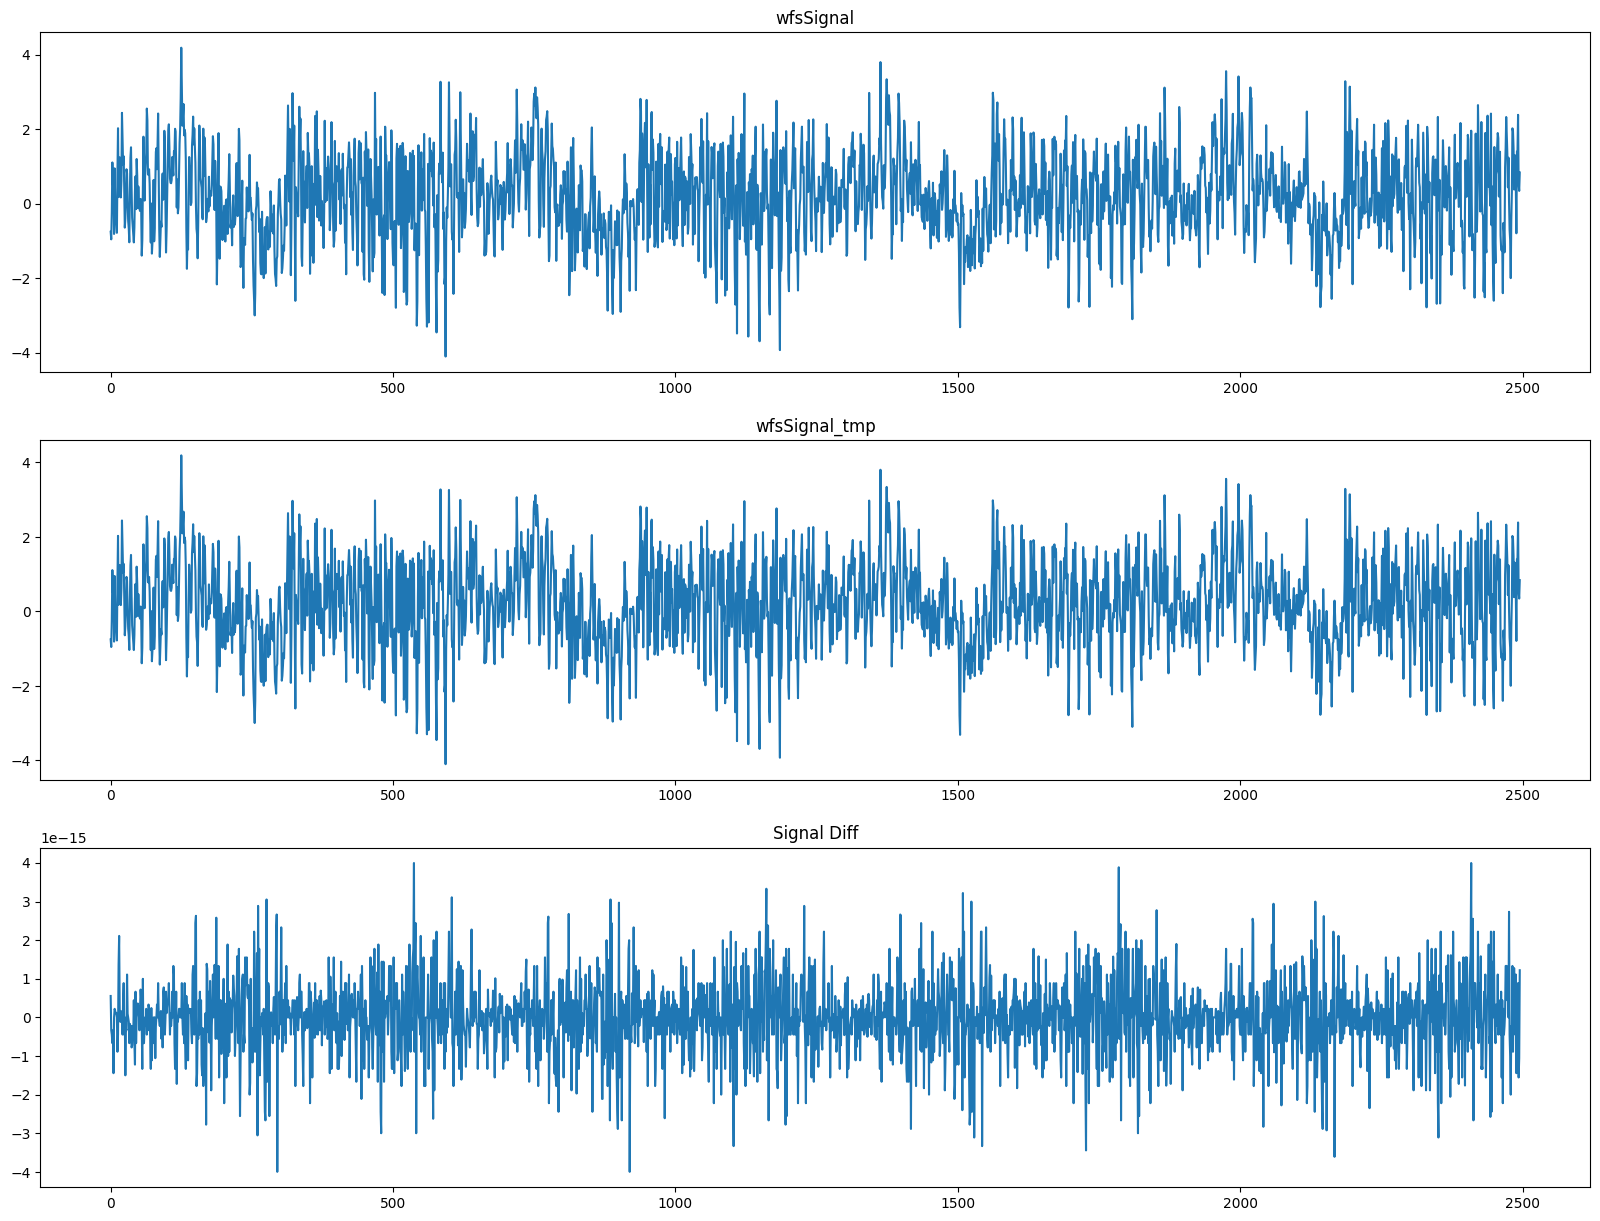

Loop12/50 AO residual: 102.39541563626658 nm


KeyboardInterrupt: 

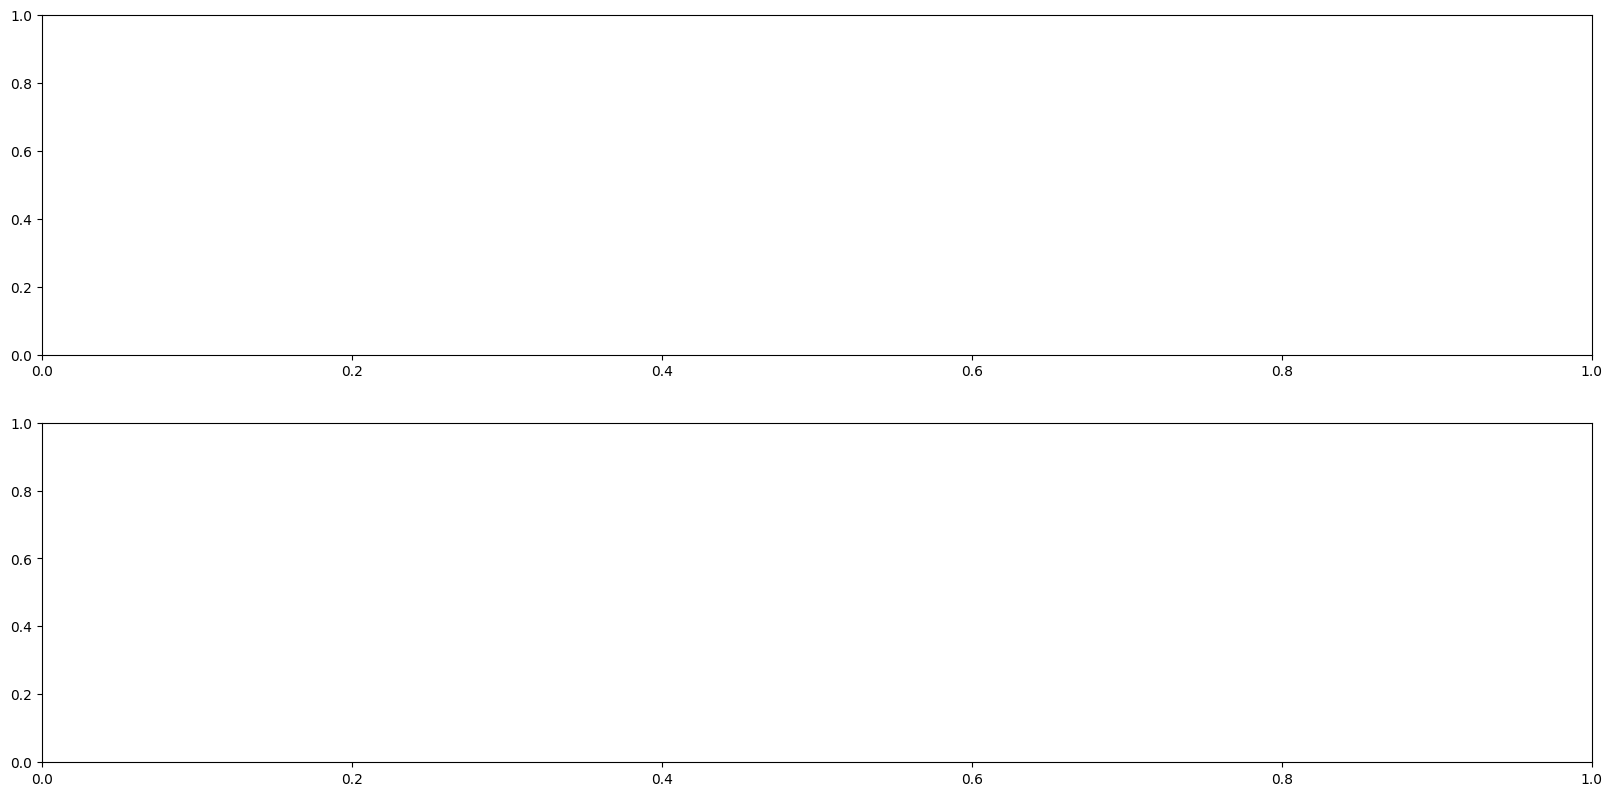

In [81]:
lgsAst**tel*dm*shwfs

if config_vars["wfs"] == 'oopao':
    print("Using OOPAO wfs")

elif config_vars["wfs"] == 'oomao':
    print("Using OOMAO wfs")

print(f"Running {config_vars['loop_mode']} loop")

for i in range(nLoop):

    atm.update()
    SciSrc**tel

    total[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9


    if config_vars["loop_mode"] == 'open':
        lgsAst**tel*shwfs*dm

    elif config_vars["loop_mode"] == 'closed':
        lgsAst**tel*dm*shwfs
    


    if config_vars["wfs"] == 'oomao':
        if n_lgs == 1:
            wfsSignal = wfsG_mat @ lgsAst.OPD[0][np.where(tel.pupil>0)] * 2 * np.pi / lgsAst.wavelength 
        else:
            flatten_opds = np.hstack(np.array([lgsAst.OPD[i][np.where(tel.pupil==1)] for i in range(lgsAst.n_source)]))
            wfsSignal = wfsG_mat @ flatten_opds * 2 * np.pi / lgsAst.wavelength 
            
    elif config_vars["wfs"] == 'oopao':
        
        wfsSignal = shwfs.signal 
        signal_tmp = wfsSignal.copy()
        for k in range(n_lgs):
            wfsSignal[k][:int(len(shwfs.signal[0])/2)] = signal_tmp[k][int(len(shwfs.signal[0])/2):]
            wfsSignal[k][int(len(shwfs.signal[0])/2):] = signal_tmp[k][:int(len(shwfs.signal[0])/2)]
        wfsSignal=np.hstack(wfsSignal)

        # lgsAst**tel*dm*shwfs



    if config_vars["loop_mode"] == 'closed':
        wfsSignal = wfsSignal-imat_geom@dm.coefs
    

    compare = True

    if compare:
        lgsAst**tel*shwfs_geom

        wfsSignal_tmp = shwfs_geom.signal 
        signal_tmp = wfsSignal_tmp.copy()
        for k in range(n_lgs):
            wfsSignal_tmp[k][:int(len(shwfs_geom.signal[0])/2)] = signal_tmp[k][int(len(shwfs_geom.signal[0])/2):]
            wfsSignal_tmp[k][int(len(shwfs_geom.signal[0])/2):] = signal_tmp[k][:int(len(shwfs_geom.signal[0])/2)]
        wfsSignal_tmp=np.hstack(wfsSignal_tmp)

        fig, axes = plt.subplots(3, 1, figsize=(20, 15))

        axes[0].plot(wfsSignal)
        axes[0].set_title(f'wfsSignal')

        axes[1].plot(wfsSignal_tmp)
        axes[1].set_title(f'wfsSignal_tmp')

        axes[2].plot(wfsSignal-wfsSignal_tmp)
        axes[2].set_title(f'Signal Diff')
        
        plt.show()

    dm.coefs = (1-gainCL)*dm.coefs - gainCL * (reconstructor@wfsSignal)

    SciSrc**tel*dm*src_cam

    SR[i]=np.exp(-np.var(SciSrc.phase[np.where(tel.pupil==1)]))
    residual[i] = np.sqrt(np.var(SciSrc.OPD[np.where(SciSrc.mask==1)])) * 1e9
    print('Loop'+str(i)+'/'+str(nLoop)+' AO residual: '+str(residual[i])+' nm')

plt.figure()
plt.plot(total)
plt.plot(residual)

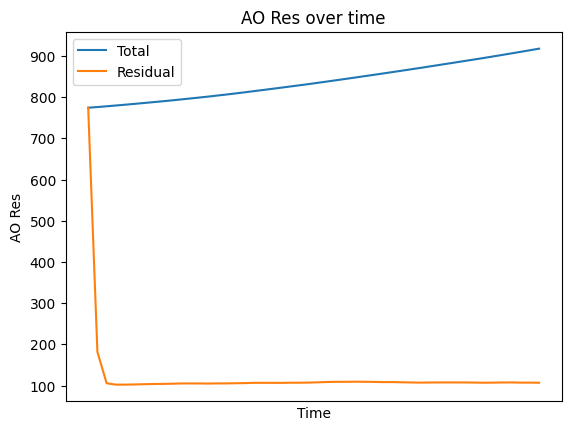

In [74]:
plt.figure()
plt.plot(total, label="Total")
plt.plot(residual, label="Residual")
plt.xlabel("Time")
plt.ylabel("AO Res")
plt.title("AO Res over time")
plt.legend()
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


OOPAO SR: 0.8476622819561048, SpaceODT SR: 0.8783061754265279


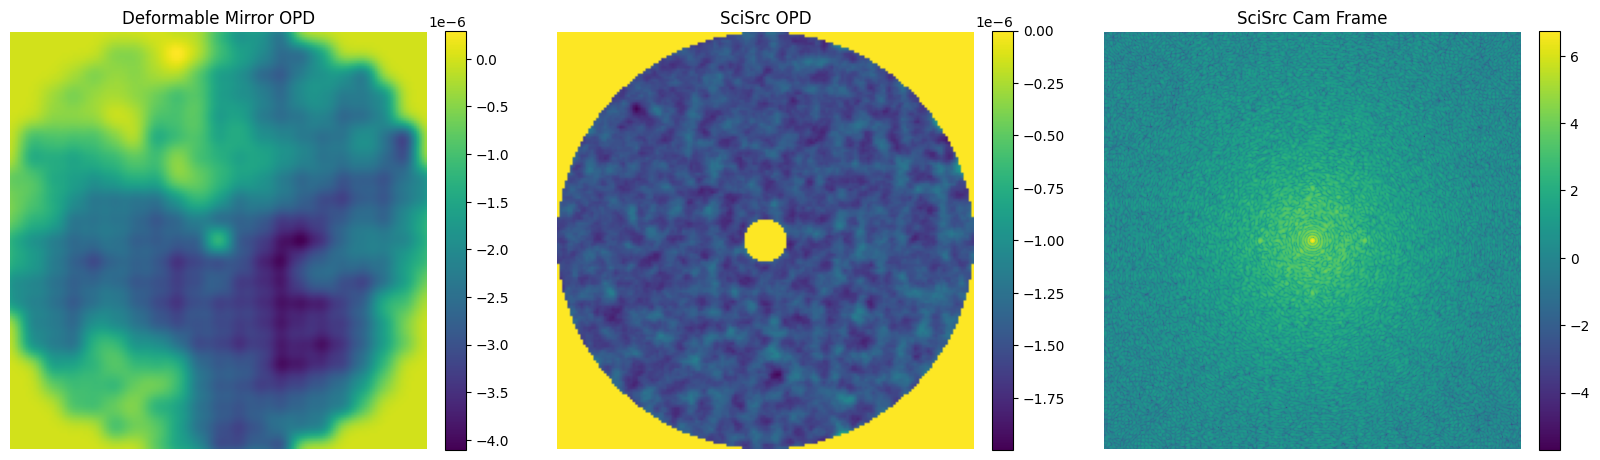

In [75]:
print(f"OOPAO SR: {SR[-1]}, SpaceODT SR: {np.max(src_cam.frame)/np.max(src_cam.reference_frame)}")

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

im = axes[0].imshow(dm_fried.OPD)
axes[0].axis('off')
axes[0].set_title(f'Deformable Mirror OPD')
fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

im = axes[1].imshow(SciSrc.OPD)
axes[1].axis('off')
axes[1].set_title(f'SciSrc OPD')
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)

im = axes[2].imshow(np.log10(np.abs(src_cam.frame)))
axes[2].axis('off')
axes[2].set_title(f'SciSrc Cam Frame')
fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

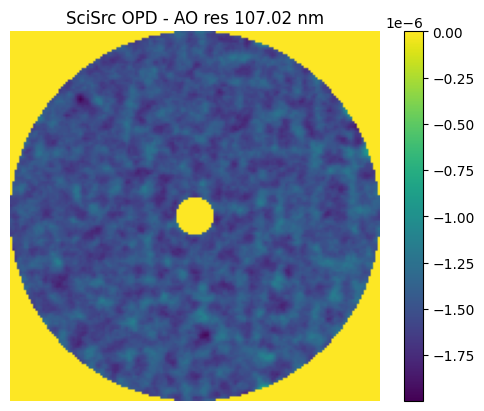

In [ ]:
plt.figure()
plt.imshow(SciSrc.OPD)
plt.title(f"SciSrc OPD - AO res {round(residual[-1], 2)} nm")
plt.axis("OFF")
plt.colorbar()


Text(0.5, 1.0, 'SciSrc Cam Frame \nMarechal SR: 0.848\nmax(i_ao)/max(i_dl) SR SR: 0.878')

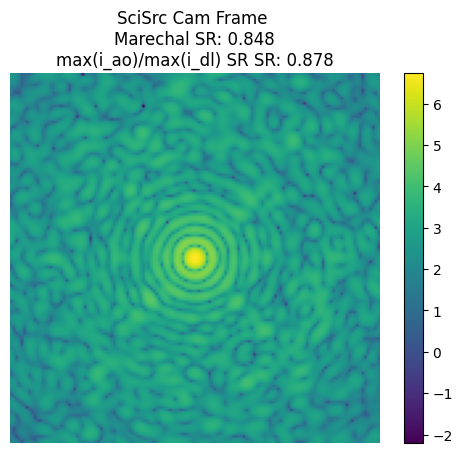

In [ ]:
# set back the reflectivity 1
tel.pupilReflectivity = tel.pupil.astype(float)

# ngs*tel
SciSrc**tel*dm #** instead of * to reset

# compute PSF method
zeroPaddingFactor = 6
tel.computePSF(zeroPaddingFactor=zeroPaddingFactor, detector=src_cam)

# get current pixel scale
size_pixel_arcsec = 206265*(tel.src.wavelength/tel.D)/zeroPaddingFactor
N                 = 250
normalized_PSF    = tel.PSF[N:-N,N:-N]# crop to zoom on the center
fov               = normalized_PSF.shape[0]*size_pixel_arcsec # get the corresponding fov
plt.imshow(np.log10(normalized_PSF),extent=[-fov/2,fov/2,-fov/2,fov/2])
plt.colorbar()
plt.axis("OFF")
plt.title(f"SciSrc Cam Frame \nMarechal SR: {round(SR[-1], 3)}\nmax(i_ao)/max(i_dl) SR SR: {round(np.max(src_cam.frame)/np.max(src_cam.reference_frame), 3)}")

In [78]:
atm


------------------------ Atmosphere -------------------------
 Layer | Direction | Speed | Altitude | Frac Cn² | Diameter |
       |    [°]    | [m/s] |   [m]    |   [%]    |   [m]    |
   1   |     0     |  5.0  |  0e+00   |    50    |  8.200   |
   2   |    30     | 15.0  |  5e+03   |    30    |  8.950   |
   3   |    70     | 25.0  |  2e+04   |    20    |  10.400  |
r0 @ 500 nm [m] |   0.16   
L0 [m]          |   50.0   
Tau0 [s]        |  0.0041  
V0 [m/s]        |  12.00   
Frequency [Hz]  |  1000.0  
-------------------------------------------------------------

In [79]:
lgsAst


--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  5.9e-07   | 10.00  |  0.00   |   inf    |   0.00    |  9.0e+09  |
  2-NGS |  5.9e-07   | 10.00  |  90.00  |   inf    |   0.00    |  9.0e+09  |
  3-NGS |  5.9e-07   | 10.00  | 180.00  |   inf    |   0.00    |  9.0e+09  |
  4-NGS |  5.9e-07   | 10.00  | 270.00  |   inf    |   0.00    |  9.0e+09  |
----------------------------------------------------------------------------

In [80]:
shwfs

OOPAO Warning: 
All Detector Noises are disables with the geometric WFS



------- Shack-Hartmann WFS --------
Subapertures [lenslets]  |   20    
Subaperture Pitch [m]    |  0.40   
Subaperture FoV [arcsec] |  1.21   
Pixel Scale [arcsec]     |  0.152  
Valid Subapertures       |   624   
Spot Sampling [pix]      |  2.00   
Geometric WFS            |  True   
-----------------------------------

In [81]:
config_vars['loop_mode']

'open'

(np.float64(-0.5), np.float64(319.5), np.float64(319.5), np.float64(-0.5))

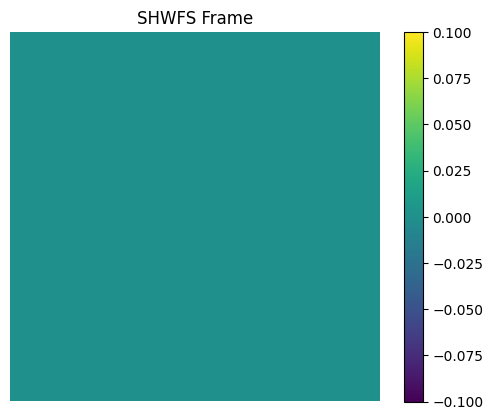

In [82]:
plt.imshow(np.vstack([np.hstack([shwfs.frames[0], shwfs.frames[1]]), 
                      np.hstack([shwfs.frames[2], shwfs.frames[3]])]))
plt.colorbar()
plt.title("SHWFS Frame")
plt.axis("OFF")

In [83]:
SciSrc**tel*dm*src_cam


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 2.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

In [84]:
src_cam.frame.shape

(640, 640)

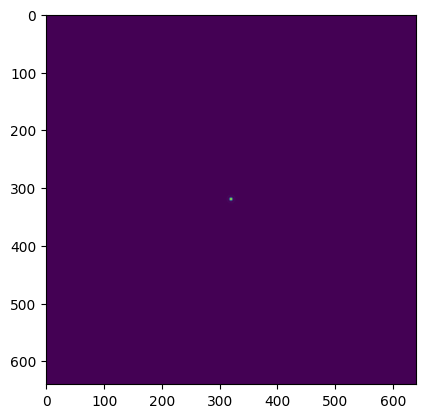

In [85]:
plt.imshow(src_cam.frame)

-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   640   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 2.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann ~~> deformableMirror
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann ~~> deformableMirror
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann ~~> deformableMirror
NGS(Na) ~~> atmo

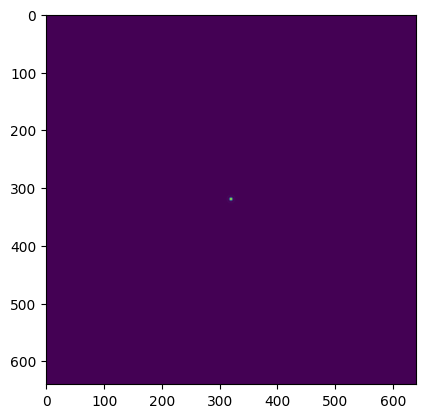


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------



In [86]:
from OOPAO.Detector import Detector

src_cam = Detector(tel.resolution*4)
src_cam.psf_sampling = 4
src_cam.integrationTime = tel.samplingTime*1
# put the scientific target off-axis to simulate anisoplanetism (set to  [0,0] to remove anisoplanetism)
# src.coordinates = [0.4,0]

# atm.generateNewPhaseScreen(seed = 10)

# Define a scientific source:
SciSrc = Source(optBand='H', magnitude=0)

# tel.resetOPD()  # initialize Telescope
lgsAst.resetOPD()

dm = dm_fried
dm.coefs = 0      # initialize DM commands
lgsAst.print_optical_path()

atm.r0 = 0.16

tel+atm # combine tel and atm to enable turbulence

# tel.computePSF(4)

# initialize DM commands
# SciSrc**tel*dm*shwfs
SciSrc**tel*dm*src_cam

SciSrc.print_optical_path()

nLoop = 200

# allocate memory to save data
SR                      = np.zeros(nLoop)
total                   = np.zeros(nLoop)
residual                = np.zeros(nLoop)
wfsSignal               = np.arange(0,shwfs.nSignal*n_lgs)*0

# loop parameters
# gainCL                  = config_vars["gainPol"]
gainCL                  = 0.8
display                 = True


# reconstructor = np.array(rec.R_unfiltered)
# reconstructor = reconstructor * lgsAst.src[0].wavelength / 2 / (tel.D/20) / 5
# reconstructor = reconstructor*4

tel-atm
SciSrc**tel*dm*src_cam
plt.imshow(src_cam.frame)
plt.show()
src_cam.reference_frame = src_cam.frame.copy()
tel+atm

from tqdm import tqdm

calib_src = Source('Na', 0)

if config_vars["loop_mode"] == 'closed':
    dm_eye = np.eye(dm_fried.nValidAct)
    imat = np.zeros((shwfs.nValidSubaperture*2, dm.nValidAct)) 
    tel-atm
    for i_act in tqdm(range(dm.nValidAct)):
        dm.coefs = dm_eye[:, i_act]*calib_src.wavelength/2/np.pi
        calib_src**tel*dm*shwfs
        imat[:, i_act] = shwfs.signal

    imat = imat*2*np.pi/calib_src.wavelength    
    imat_tmp = imat.copy()
    imat[:shwfs.nValidSubaperture, :] = imat_tmp[shwfs.nValidSubaperture:, :]
    imat[shwfs.nValidSubaperture:, :] = imat_tmp[:shwfs.nValidSubaperture, :]


    imat = np.vstack([imat]*n_lgs)

    tel+atm

i = 0


1.0


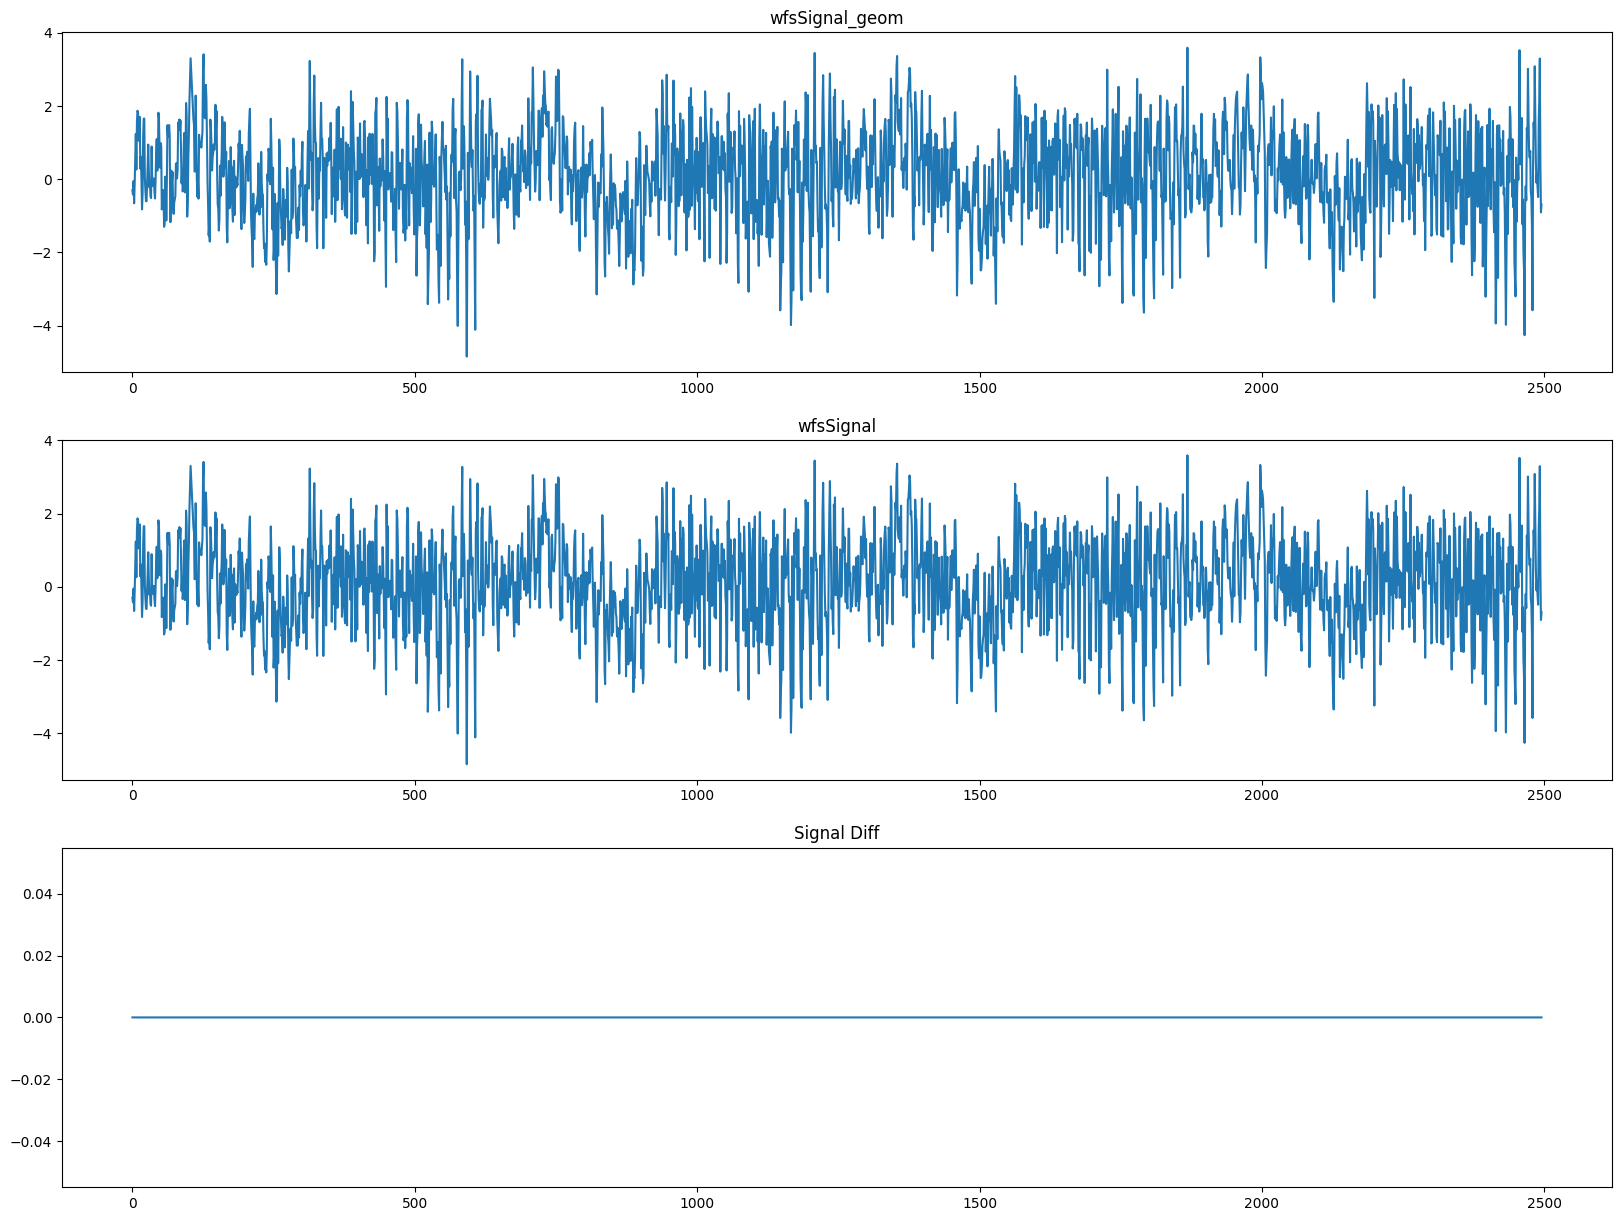

Loop0/200 AO residual: 921.9863759599549 nm


In [87]:
dm.coefs = 0

lgsAst**tel*dm*shwfs


atm.update()
SciSrc**tel

total[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9


if config_vars["loop_mode"] == 'open':
    lgsAst**tel*shwfs

elif config_vars["loop_mode"] == 'closed':
    lgsAst**tel*dm*shwfs

SciSrc**tel*dm*src_cam

if config_vars["wfs"] == 'oomao':
    if n_lgs == 1:
        wfsSignal = wfsG_mat @ lgsAst.OPD[0][np.where(tel.pupil>0)] * 2 * np.pi / lgsAst.wavelength 
    else:
        flatten_opds = np.hstack(np.array([lgsAst.OPD[i][np.where(tel.pupil==1)] for i in range(lgsAst.n_source)]))
        wfsSignal = wfsG_mat @ flatten_opds * 2 * np.pi / lgsAst.wavelength 
        
elif config_vars["wfs"] == 'oopao':
    
    wfsSignal = shwfs.signal 
    signal_tmp = wfsSignal.copy()
    for k in range(n_lgs):
        wfsSignal[k][:int(len(shwfs.signal[0])/2)] = signal_tmp[k][int(len(shwfs.signal[0])/2):]
        wfsSignal[k][int(len(shwfs.signal[0])/2):] = signal_tmp[k][:int(len(shwfs.signal[0])/2)]
    wfsSignal=np.hstack(wfsSignal)

# if not is_geometric:
#     wfsSignal = wfsSignal*0.9

compare = True

if compare:

    lgsAst**tel*dm*shwfs_geom

    wfsSignal_geom = shwfs_geom.signal 
    signal_tmp = wfsSignal_geom.copy()
    for k in range(n_lgs):
        wfsSignal_geom[k][:int(len(shwfs_geom.signal[0])/2)] = signal_tmp[k][int(len(shwfs_geom.signal[0])/2):]
        wfsSignal_geom[k][int(len(shwfs_geom.signal[0])/2):] = signal_tmp[k][:int(len(shwfs_geom.signal[0])/2)]
    wfsSignal_geom=np.hstack(wfsSignal_geom)

    m = np.mean(np.abs(wfsSignal_geom/wfsSignal))
    print(m)

    fig, axes = plt.subplots(3, 1, figsize=(20, 15))

    axes[0].plot(wfsSignal_geom)
    axes[0].set_title(f'wfsSignal_geom')

    axes[1].plot(wfsSignal)
    axes[1].set_title(f'wfsSignal')

    axes[2].plot(wfsSignal_geom-wfsSignal)
    axes[2].set_title(f'Signal Diff')
    
    plt.show()

    lgsAst**tel*dm*shwfs

if config_vars["loop_mode"] == 'open':
    lgsAst*dm

elif config_vars["loop_mode"] == 'closed':
    wfsSignal = wfsSignal-imat@dm.coefs




# dm.coefs = (1-gainCL)*dm.coefs - gainCL * (reconstructor@wfsSignal)

SR[i]=np.exp(-np.var(SciSrc.phase[np.where(tel.pupil==1)]))
residual[i] = np.sqrt(np.var(SciSrc.OPD[np.where(SciSrc.mask==1)])) * 1e9
print('Loop'+str(i)+'/'+str(nLoop)+' AO residual: '+str(residual[i])+' nm')

i+=1

# plt.figure()
# plt.plot(total)
# plt.plot(residual)

In [88]:
np.pi/2

1.5707963267948966